In [16]:
%config Completer.use_jedi=False
import torch
from torch import nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
class NeuralNet(nn.Module):
    
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.conv1=nn.Conv2d(3,4,4)
        self.conv2=nn.Conv2d(4,8,4)
        self.flatten=nn.Flatten()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1=nn.Linear(8*5*5,100)
        self.fc2=nn.Linear(100,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.flatten(x)
#         print(x.shape)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x

In [3]:
net=NeuralNet()
# Loss & optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)

In [ ]:
out=net(x)
out.shape,y.shape

In [ ]:
x=torch.from_numpy(np.random.rand(100,3,32,32))
x=x.type('torch.FloatTensor')
y=torch.from_numpy(np.random.rand(100,10))
y=torch.max(y, 1)[0]
y=y.type('torch.LongTensor')

In [ ]:
# Train 
for _ in range(5):
    net.zero_grad()
    out=net(x)
    loss=criterion(out,y)
    print(loss)
    loss.backward()
    optimizer.step()



In [ ]:
torch.max(y, 1)[0]

In [4]:
import torchvision
from torchvision import transforms

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
trainset=torchvision.datasets.CIFAR10(root='/data',train=True,transform=transform,download=True)

Files already downloaded and verified


In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [8]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [30]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [31]:
testset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [33]:
classes=list(trainset.class_to_idx.keys())
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
for epoch in range(2):
    for data in trainloader:
        train,target=data
        net.zero_grad()
        out=net(train)
        loss=criterion(out,target)
        print(loss)
        loss.backward()
        optimizer.step()

tensor(2.2629, grad_fn=<NllLossBackward>)
tensor(2.3897, grad_fn=<NllLossBackward>)
tensor(2.3393, grad_fn=<NllLossBackward>)
tensor(2.2808, grad_fn=<NllLossBackward>)
tensor(2.3572, grad_fn=<NllLossBackward>)
tensor(2.2494, grad_fn=<NllLossBackward>)
tensor(2.4088, grad_fn=<NllLossBackward>)
tensor(2.3434, grad_fn=<NllLossBackward>)
tensor(2.2919, grad_fn=<NllLossBackward>)
tensor(2.3440, grad_fn=<NllLossBackward>)
tensor(2.3711, grad_fn=<NllLossBackward>)
tensor(2.2910, grad_fn=<NllLossBackward>)
tensor(2.3042, grad_fn=<NllLossBackward>)
tensor(2.3209, grad_fn=<NllLossBackward>)
tensor(2.3376, grad_fn=<NllLossBackward>)
tensor(2.3151, grad_fn=<NllLossBackward>)
tensor(2.2223, grad_fn=<NllLossBackward>)
tensor(2.3083, grad_fn=<NllLossBackward>)
tensor(2.3036, grad_fn=<NllLossBackward>)
tensor(2.3148, grad_fn=<NllLossBackward>)
tensor(2.2980, grad_fn=<NllLossBackward>)
tensor(2.3261, grad_fn=<NllLossBackward>)
tensor(2.3001, grad_fn=<NllLossBackward>)
tensor(2.2528, grad_fn=<NllLossBac

tensor(2.3074, grad_fn=<NllLossBackward>)
tensor(2.3342, grad_fn=<NllLossBackward>)
tensor(2.2822, grad_fn=<NllLossBackward>)
tensor(2.2702, grad_fn=<NllLossBackward>)
tensor(2.3243, grad_fn=<NllLossBackward>)
tensor(2.2979, grad_fn=<NllLossBackward>)
tensor(2.2929, grad_fn=<NllLossBackward>)
tensor(2.2754, grad_fn=<NllLossBackward>)
tensor(2.3578, grad_fn=<NllLossBackward>)
tensor(2.2901, grad_fn=<NllLossBackward>)
tensor(2.2800, grad_fn=<NllLossBackward>)
tensor(2.2671, grad_fn=<NllLossBackward>)
tensor(2.2643, grad_fn=<NllLossBackward>)
tensor(2.3112, grad_fn=<NllLossBackward>)
tensor(2.2709, grad_fn=<NllLossBackward>)
tensor(2.2780, grad_fn=<NllLossBackward>)
tensor(2.2853, grad_fn=<NllLossBackward>)
tensor(2.3278, grad_fn=<NllLossBackward>)
tensor(2.2885, grad_fn=<NllLossBackward>)
tensor(2.2928, grad_fn=<NllLossBackward>)
tensor(2.2998, grad_fn=<NllLossBackward>)
tensor(2.3344, grad_fn=<NllLossBackward>)
tensor(2.2646, grad_fn=<NllLossBackward>)
tensor(2.2865, grad_fn=<NllLossBac

tensor(2.1716, grad_fn=<NllLossBackward>)
tensor(2.3146, grad_fn=<NllLossBackward>)
tensor(2.3056, grad_fn=<NllLossBackward>)
tensor(2.1771, grad_fn=<NllLossBackward>)
tensor(2.3182, grad_fn=<NllLossBackward>)
tensor(2.2512, grad_fn=<NllLossBackward>)
tensor(2.2424, grad_fn=<NllLossBackward>)
tensor(2.2021, grad_fn=<NllLossBackward>)
tensor(2.1526, grad_fn=<NllLossBackward>)
tensor(2.2454, grad_fn=<NllLossBackward>)
tensor(2.1925, grad_fn=<NllLossBackward>)
tensor(2.2745, grad_fn=<NllLossBackward>)
tensor(2.3048, grad_fn=<NllLossBackward>)
tensor(2.3315, grad_fn=<NllLossBackward>)
tensor(2.2593, grad_fn=<NllLossBackward>)
tensor(2.1699, grad_fn=<NllLossBackward>)
tensor(2.1989, grad_fn=<NllLossBackward>)
tensor(2.2379, grad_fn=<NllLossBackward>)
tensor(2.2402, grad_fn=<NllLossBackward>)
tensor(2.1909, grad_fn=<NllLossBackward>)
tensor(2.1938, grad_fn=<NllLossBackward>)
tensor(2.3429, grad_fn=<NllLossBackward>)
tensor(2.2474, grad_fn=<NllLossBackward>)
tensor(2.3049, grad_fn=<NllLossBac

tensor(2.1757, grad_fn=<NllLossBackward>)
tensor(2.3750, grad_fn=<NllLossBackward>)
tensor(1.9877, grad_fn=<NllLossBackward>)
tensor(2.4399, grad_fn=<NllLossBackward>)
tensor(2.1022, grad_fn=<NllLossBackward>)
tensor(2.3147, grad_fn=<NllLossBackward>)
tensor(2.2289, grad_fn=<NllLossBackward>)
tensor(1.6932, grad_fn=<NllLossBackward>)
tensor(2.0080, grad_fn=<NllLossBackward>)
tensor(2.2130, grad_fn=<NllLossBackward>)
tensor(1.9578, grad_fn=<NllLossBackward>)
tensor(1.7873, grad_fn=<NllLossBackward>)
tensor(2.4893, grad_fn=<NllLossBackward>)
tensor(2.6236, grad_fn=<NllLossBackward>)
tensor(2.1791, grad_fn=<NllLossBackward>)
tensor(2.1526, grad_fn=<NllLossBackward>)
tensor(2.1508, grad_fn=<NllLossBackward>)
tensor(2.2475, grad_fn=<NllLossBackward>)
tensor(1.8290, grad_fn=<NllLossBackward>)
tensor(2.4699, grad_fn=<NllLossBackward>)
tensor(2.3554, grad_fn=<NllLossBackward>)
tensor(2.4445, grad_fn=<NllLossBackward>)
tensor(2.0984, grad_fn=<NllLossBackward>)
tensor(2.1694, grad_fn=<NllLossBac

tensor(2.0487, grad_fn=<NllLossBackward>)
tensor(1.8783, grad_fn=<NllLossBackward>)
tensor(2.2948, grad_fn=<NllLossBackward>)
tensor(2.0047, grad_fn=<NllLossBackward>)
tensor(1.7924, grad_fn=<NllLossBackward>)
tensor(2.6285, grad_fn=<NllLossBackward>)
tensor(1.8101, grad_fn=<NllLossBackward>)
tensor(1.9934, grad_fn=<NllLossBackward>)
tensor(2.4325, grad_fn=<NllLossBackward>)
tensor(2.2755, grad_fn=<NllLossBackward>)
tensor(1.7390, grad_fn=<NllLossBackward>)
tensor(2.4256, grad_fn=<NllLossBackward>)
tensor(2.2376, grad_fn=<NllLossBackward>)
tensor(1.8482, grad_fn=<NllLossBackward>)
tensor(1.9807, grad_fn=<NllLossBackward>)
tensor(2.4718, grad_fn=<NllLossBackward>)
tensor(2.0585, grad_fn=<NllLossBackward>)
tensor(2.3167, grad_fn=<NllLossBackward>)
tensor(1.8696, grad_fn=<NllLossBackward>)
tensor(2.3433, grad_fn=<NllLossBackward>)
tensor(2.1622, grad_fn=<NllLossBackward>)
tensor(1.6725, grad_fn=<NllLossBackward>)
tensor(1.9578, grad_fn=<NllLossBackward>)
tensor(2.1647, grad_fn=<NllLossBac

tensor(1.5862, grad_fn=<NllLossBackward>)
tensor(2.0129, grad_fn=<NllLossBackward>)
tensor(1.6344, grad_fn=<NllLossBackward>)
tensor(1.9322, grad_fn=<NllLossBackward>)
tensor(1.8017, grad_fn=<NllLossBackward>)
tensor(2.0998, grad_fn=<NllLossBackward>)
tensor(2.2465, grad_fn=<NllLossBackward>)
tensor(1.7424, grad_fn=<NllLossBackward>)
tensor(2.2197, grad_fn=<NllLossBackward>)
tensor(1.8259, grad_fn=<NllLossBackward>)
tensor(1.9274, grad_fn=<NllLossBackward>)
tensor(1.6562, grad_fn=<NllLossBackward>)
tensor(1.7754, grad_fn=<NllLossBackward>)
tensor(2.0573, grad_fn=<NllLossBackward>)
tensor(2.0895, grad_fn=<NllLossBackward>)
tensor(2.5363, grad_fn=<NllLossBackward>)
tensor(2.0900, grad_fn=<NllLossBackward>)
tensor(2.1193, grad_fn=<NllLossBackward>)
tensor(1.8446, grad_fn=<NllLossBackward>)
tensor(2.7232, grad_fn=<NllLossBackward>)
tensor(1.6089, grad_fn=<NllLossBackward>)
tensor(1.4524, grad_fn=<NllLossBackward>)
tensor(2.9922, grad_fn=<NllLossBackward>)
tensor(2.0850, grad_fn=<NllLossBac

tensor(2.5893, grad_fn=<NllLossBackward>)
tensor(1.8528, grad_fn=<NllLossBackward>)
tensor(1.9020, grad_fn=<NllLossBackward>)
tensor(2.1769, grad_fn=<NllLossBackward>)
tensor(1.8027, grad_fn=<NllLossBackward>)
tensor(2.4275, grad_fn=<NllLossBackward>)
tensor(1.7447, grad_fn=<NllLossBackward>)
tensor(1.6383, grad_fn=<NllLossBackward>)
tensor(2.2389, grad_fn=<NllLossBackward>)
tensor(2.6821, grad_fn=<NllLossBackward>)
tensor(2.3159, grad_fn=<NllLossBackward>)
tensor(2.6988, grad_fn=<NllLossBackward>)
tensor(1.7347, grad_fn=<NllLossBackward>)
tensor(1.7800, grad_fn=<NllLossBackward>)
tensor(1.6203, grad_fn=<NllLossBackward>)
tensor(1.6660, grad_fn=<NllLossBackward>)
tensor(2.0124, grad_fn=<NllLossBackward>)
tensor(2.5366, grad_fn=<NllLossBackward>)
tensor(1.8732, grad_fn=<NllLossBackward>)
tensor(1.5655, grad_fn=<NllLossBackward>)
tensor(2.4015, grad_fn=<NllLossBackward>)
tensor(1.7341, grad_fn=<NllLossBackward>)
tensor(1.7358, grad_fn=<NllLossBackward>)
tensor(2.2932, grad_fn=<NllLossBac

tensor(2.0188, grad_fn=<NllLossBackward>)
tensor(1.0855, grad_fn=<NllLossBackward>)
tensor(1.4934, grad_fn=<NllLossBackward>)
tensor(2.3961, grad_fn=<NllLossBackward>)
tensor(2.1643, grad_fn=<NllLossBackward>)
tensor(1.3074, grad_fn=<NllLossBackward>)
tensor(1.6547, grad_fn=<NllLossBackward>)
tensor(1.8925, grad_fn=<NllLossBackward>)
tensor(2.3680, grad_fn=<NllLossBackward>)
tensor(2.6477, grad_fn=<NllLossBackward>)
tensor(2.3407, grad_fn=<NllLossBackward>)
tensor(1.8989, grad_fn=<NllLossBackward>)
tensor(1.8970, grad_fn=<NllLossBackward>)
tensor(1.5126, grad_fn=<NllLossBackward>)
tensor(1.7961, grad_fn=<NllLossBackward>)
tensor(1.4463, grad_fn=<NllLossBackward>)
tensor(1.7220, grad_fn=<NllLossBackward>)
tensor(2.3351, grad_fn=<NllLossBackward>)
tensor(1.1443, grad_fn=<NllLossBackward>)
tensor(1.2523, grad_fn=<NllLossBackward>)
tensor(1.1731, grad_fn=<NllLossBackward>)
tensor(1.8841, grad_fn=<NllLossBackward>)
tensor(2.6191, grad_fn=<NllLossBackward>)
tensor(1.8581, grad_fn=<NllLossBac

tensor(1.3667, grad_fn=<NllLossBackward>)
tensor(1.6253, grad_fn=<NllLossBackward>)
tensor(1.5732, grad_fn=<NllLossBackward>)
tensor(1.8836, grad_fn=<NllLossBackward>)
tensor(1.6997, grad_fn=<NllLossBackward>)
tensor(1.9722, grad_fn=<NllLossBackward>)
tensor(1.9332, grad_fn=<NllLossBackward>)
tensor(1.8356, grad_fn=<NllLossBackward>)
tensor(1.7746, grad_fn=<NllLossBackward>)
tensor(2.0429, grad_fn=<NllLossBackward>)
tensor(1.9431, grad_fn=<NllLossBackward>)
tensor(2.5933, grad_fn=<NllLossBackward>)
tensor(1.6220, grad_fn=<NllLossBackward>)
tensor(1.3378, grad_fn=<NllLossBackward>)
tensor(1.6087, grad_fn=<NllLossBackward>)
tensor(2.7703, grad_fn=<NllLossBackward>)
tensor(1.1837, grad_fn=<NllLossBackward>)
tensor(2.5273, grad_fn=<NllLossBackward>)
tensor(1.6269, grad_fn=<NllLossBackward>)
tensor(1.7064, grad_fn=<NllLossBackward>)
tensor(1.6478, grad_fn=<NllLossBackward>)
tensor(3.0980, grad_fn=<NllLossBackward>)
tensor(1.5961, grad_fn=<NllLossBackward>)
tensor(1.6482, grad_fn=<NllLossBac

tensor(2.4519, grad_fn=<NllLossBackward>)
tensor(1.3875, grad_fn=<NllLossBackward>)
tensor(2.3621, grad_fn=<NllLossBackward>)
tensor(2.0070, grad_fn=<NllLossBackward>)
tensor(2.4899, grad_fn=<NllLossBackward>)
tensor(2.0767, grad_fn=<NllLossBackward>)
tensor(2.0426, grad_fn=<NllLossBackward>)
tensor(1.2590, grad_fn=<NllLossBackward>)
tensor(1.4709, grad_fn=<NllLossBackward>)
tensor(2.0714, grad_fn=<NllLossBackward>)
tensor(2.8133, grad_fn=<NllLossBackward>)
tensor(1.2900, grad_fn=<NllLossBackward>)
tensor(1.9171, grad_fn=<NllLossBackward>)
tensor(1.6857, grad_fn=<NllLossBackward>)
tensor(1.3251, grad_fn=<NllLossBackward>)
tensor(1.3859, grad_fn=<NllLossBackward>)
tensor(2.2503, grad_fn=<NllLossBackward>)
tensor(2.5563, grad_fn=<NllLossBackward>)
tensor(1.7331, grad_fn=<NllLossBackward>)
tensor(1.7960, grad_fn=<NllLossBackward>)
tensor(2.0581, grad_fn=<NllLossBackward>)
tensor(1.3771, grad_fn=<NllLossBackward>)
tensor(1.0515, grad_fn=<NllLossBackward>)
tensor(1.7726, grad_fn=<NllLossBac

tensor(1.8975, grad_fn=<NllLossBackward>)
tensor(1.6699, grad_fn=<NllLossBackward>)
tensor(1.7776, grad_fn=<NllLossBackward>)
tensor(2.0398, grad_fn=<NllLossBackward>)
tensor(1.7104, grad_fn=<NllLossBackward>)
tensor(2.1914, grad_fn=<NllLossBackward>)
tensor(1.7833, grad_fn=<NllLossBackward>)
tensor(1.7017, grad_fn=<NllLossBackward>)
tensor(1.7893, grad_fn=<NllLossBackward>)
tensor(2.0531, grad_fn=<NllLossBackward>)
tensor(1.6398, grad_fn=<NllLossBackward>)
tensor(1.2950, grad_fn=<NllLossBackward>)
tensor(1.1235, grad_fn=<NllLossBackward>)
tensor(1.5251, grad_fn=<NllLossBackward>)
tensor(2.1323, grad_fn=<NllLossBackward>)
tensor(1.5642, grad_fn=<NllLossBackward>)
tensor(2.3174, grad_fn=<NllLossBackward>)
tensor(1.4963, grad_fn=<NllLossBackward>)
tensor(1.3624, grad_fn=<NllLossBackward>)
tensor(1.9764, grad_fn=<NllLossBackward>)
tensor(2.0785, grad_fn=<NllLossBackward>)
tensor(1.8359, grad_fn=<NllLossBackward>)
tensor(1.3869, grad_fn=<NllLossBackward>)
tensor(2.4356, grad_fn=<NllLossBac

tensor(1.9906, grad_fn=<NllLossBackward>)
tensor(2.1600, grad_fn=<NllLossBackward>)
tensor(2.0672, grad_fn=<NllLossBackward>)
tensor(1.4533, grad_fn=<NllLossBackward>)
tensor(2.0002, grad_fn=<NllLossBackward>)
tensor(1.4402, grad_fn=<NllLossBackward>)
tensor(1.6861, grad_fn=<NllLossBackward>)
tensor(1.4369, grad_fn=<NllLossBackward>)
tensor(1.7167, grad_fn=<NllLossBackward>)
tensor(1.7376, grad_fn=<NllLossBackward>)
tensor(1.9104, grad_fn=<NllLossBackward>)
tensor(1.6360, grad_fn=<NllLossBackward>)
tensor(1.1374, grad_fn=<NllLossBackward>)
tensor(1.1805, grad_fn=<NllLossBackward>)
tensor(2.2910, grad_fn=<NllLossBackward>)
tensor(2.8518, grad_fn=<NllLossBackward>)
tensor(1.9769, grad_fn=<NllLossBackward>)
tensor(1.5728, grad_fn=<NllLossBackward>)
tensor(1.6271, grad_fn=<NllLossBackward>)
tensor(1.8620, grad_fn=<NllLossBackward>)
tensor(2.3549, grad_fn=<NllLossBackward>)
tensor(1.7088, grad_fn=<NllLossBackward>)
tensor(1.2430, grad_fn=<NllLossBackward>)
tensor(1.5550, grad_fn=<NllLossBac

tensor(1.1192, grad_fn=<NllLossBackward>)
tensor(1.1437, grad_fn=<NllLossBackward>)
tensor(1.6388, grad_fn=<NllLossBackward>)
tensor(1.8372, grad_fn=<NllLossBackward>)
tensor(1.7219, grad_fn=<NllLossBackward>)
tensor(1.7556, grad_fn=<NllLossBackward>)
tensor(1.6987, grad_fn=<NllLossBackward>)
tensor(2.4637, grad_fn=<NllLossBackward>)
tensor(1.9813, grad_fn=<NllLossBackward>)
tensor(1.7083, grad_fn=<NllLossBackward>)
tensor(2.3219, grad_fn=<NllLossBackward>)
tensor(1.5654, grad_fn=<NllLossBackward>)
tensor(1.9784, grad_fn=<NllLossBackward>)
tensor(2.1473, grad_fn=<NllLossBackward>)
tensor(1.9570, grad_fn=<NllLossBackward>)
tensor(1.8134, grad_fn=<NllLossBackward>)
tensor(2.1498, grad_fn=<NllLossBackward>)
tensor(1.6129, grad_fn=<NllLossBackward>)
tensor(1.7629, grad_fn=<NllLossBackward>)
tensor(1.9216, grad_fn=<NllLossBackward>)
tensor(1.8645, grad_fn=<NllLossBackward>)
tensor(1.9111, grad_fn=<NllLossBackward>)
tensor(1.7842, grad_fn=<NllLossBackward>)
tensor(0.7464, grad_fn=<NllLossBac

tensor(1.9546, grad_fn=<NllLossBackward>)
tensor(1.9532, grad_fn=<NllLossBackward>)
tensor(1.7682, grad_fn=<NllLossBackward>)
tensor(1.6679, grad_fn=<NllLossBackward>)
tensor(1.4215, grad_fn=<NllLossBackward>)
tensor(1.9647, grad_fn=<NllLossBackward>)
tensor(2.1070, grad_fn=<NllLossBackward>)
tensor(1.5024, grad_fn=<NllLossBackward>)
tensor(1.8396, grad_fn=<NllLossBackward>)
tensor(2.0492, grad_fn=<NllLossBackward>)
tensor(1.6984, grad_fn=<NllLossBackward>)
tensor(1.8407, grad_fn=<NllLossBackward>)
tensor(1.9269, grad_fn=<NllLossBackward>)
tensor(1.2391, grad_fn=<NllLossBackward>)
tensor(1.3522, grad_fn=<NllLossBackward>)
tensor(1.8506, grad_fn=<NllLossBackward>)
tensor(1.3894, grad_fn=<NllLossBackward>)
tensor(2.1675, grad_fn=<NllLossBackward>)
tensor(1.4742, grad_fn=<NllLossBackward>)
tensor(1.3513, grad_fn=<NllLossBackward>)
tensor(1.6106, grad_fn=<NllLossBackward>)
tensor(1.3738, grad_fn=<NllLossBackward>)
tensor(1.6824, grad_fn=<NllLossBackward>)
tensor(2.1131, grad_fn=<NllLossBac

tensor(1.6533, grad_fn=<NllLossBackward>)
tensor(1.4980, grad_fn=<NllLossBackward>)
tensor(1.2966, grad_fn=<NllLossBackward>)
tensor(2.0766, grad_fn=<NllLossBackward>)
tensor(1.9158, grad_fn=<NllLossBackward>)
tensor(0.8768, grad_fn=<NllLossBackward>)
tensor(1.9290, grad_fn=<NllLossBackward>)
tensor(1.8255, grad_fn=<NllLossBackward>)
tensor(1.4595, grad_fn=<NllLossBackward>)
tensor(1.4981, grad_fn=<NllLossBackward>)
tensor(1.2928, grad_fn=<NllLossBackward>)
tensor(2.4692, grad_fn=<NllLossBackward>)
tensor(2.1227, grad_fn=<NllLossBackward>)
tensor(1.7307, grad_fn=<NllLossBackward>)
tensor(1.2307, grad_fn=<NllLossBackward>)
tensor(1.5923, grad_fn=<NllLossBackward>)
tensor(1.4730, grad_fn=<NllLossBackward>)
tensor(2.3087, grad_fn=<NllLossBackward>)
tensor(1.8864, grad_fn=<NllLossBackward>)
tensor(1.3488, grad_fn=<NllLossBackward>)
tensor(1.5289, grad_fn=<NllLossBackward>)
tensor(1.5635, grad_fn=<NllLossBackward>)
tensor(1.4402, grad_fn=<NllLossBackward>)
tensor(1.3344, grad_fn=<NllLossBac

tensor(1.8061, grad_fn=<NllLossBackward>)
tensor(2.3231, grad_fn=<NllLossBackward>)
tensor(2.0024, grad_fn=<NllLossBackward>)
tensor(1.6913, grad_fn=<NllLossBackward>)
tensor(1.4425, grad_fn=<NllLossBackward>)
tensor(2.8530, grad_fn=<NllLossBackward>)
tensor(2.0374, grad_fn=<NllLossBackward>)
tensor(1.9310, grad_fn=<NllLossBackward>)
tensor(1.5223, grad_fn=<NllLossBackward>)
tensor(2.6509, grad_fn=<NllLossBackward>)
tensor(1.7030, grad_fn=<NllLossBackward>)
tensor(1.7212, grad_fn=<NllLossBackward>)
tensor(1.0830, grad_fn=<NllLossBackward>)
tensor(1.3250, grad_fn=<NllLossBackward>)
tensor(2.0735, grad_fn=<NllLossBackward>)
tensor(1.8475, grad_fn=<NllLossBackward>)
tensor(1.8820, grad_fn=<NllLossBackward>)
tensor(1.6111, grad_fn=<NllLossBackward>)
tensor(2.0542, grad_fn=<NllLossBackward>)
tensor(1.9789, grad_fn=<NllLossBackward>)
tensor(1.6015, grad_fn=<NllLossBackward>)
tensor(1.8870, grad_fn=<NllLossBackward>)
tensor(1.5318, grad_fn=<NllLossBackward>)
tensor(1.4490, grad_fn=<NllLossBac

tensor(1.6212, grad_fn=<NllLossBackward>)
tensor(1.5371, grad_fn=<NllLossBackward>)
tensor(1.4460, grad_fn=<NllLossBackward>)
tensor(1.1040, grad_fn=<NllLossBackward>)
tensor(2.7779, grad_fn=<NllLossBackward>)
tensor(1.6386, grad_fn=<NllLossBackward>)
tensor(1.6208, grad_fn=<NllLossBackward>)
tensor(1.1089, grad_fn=<NllLossBackward>)
tensor(1.7921, grad_fn=<NllLossBackward>)
tensor(1.7570, grad_fn=<NllLossBackward>)
tensor(1.4697, grad_fn=<NllLossBackward>)
tensor(1.8245, grad_fn=<NllLossBackward>)
tensor(1.7454, grad_fn=<NllLossBackward>)
tensor(1.6523, grad_fn=<NllLossBackward>)
tensor(1.0733, grad_fn=<NllLossBackward>)
tensor(1.6131, grad_fn=<NllLossBackward>)
tensor(1.2983, grad_fn=<NllLossBackward>)
tensor(2.4014, grad_fn=<NllLossBackward>)
tensor(1.5229, grad_fn=<NllLossBackward>)
tensor(2.1212, grad_fn=<NllLossBackward>)
tensor(1.9020, grad_fn=<NllLossBackward>)
tensor(1.9735, grad_fn=<NllLossBackward>)
tensor(1.2174, grad_fn=<NllLossBackward>)
tensor(1.8065, grad_fn=<NllLossBac

tensor(1.8455, grad_fn=<NllLossBackward>)
tensor(1.0286, grad_fn=<NllLossBackward>)
tensor(1.5730, grad_fn=<NllLossBackward>)
tensor(2.0388, grad_fn=<NllLossBackward>)
tensor(1.4686, grad_fn=<NllLossBackward>)
tensor(1.6573, grad_fn=<NllLossBackward>)
tensor(1.6586, grad_fn=<NllLossBackward>)
tensor(2.0791, grad_fn=<NllLossBackward>)
tensor(2.3547, grad_fn=<NllLossBackward>)
tensor(1.4372, grad_fn=<NllLossBackward>)
tensor(1.3178, grad_fn=<NllLossBackward>)
tensor(1.8035, grad_fn=<NllLossBackward>)
tensor(1.6784, grad_fn=<NllLossBackward>)
tensor(1.8835, grad_fn=<NllLossBackward>)
tensor(2.5609, grad_fn=<NllLossBackward>)
tensor(1.6816, grad_fn=<NllLossBackward>)
tensor(1.2698, grad_fn=<NllLossBackward>)
tensor(2.0560, grad_fn=<NllLossBackward>)
tensor(1.7290, grad_fn=<NllLossBackward>)
tensor(1.6551, grad_fn=<NllLossBackward>)
tensor(1.3879, grad_fn=<NllLossBackward>)
tensor(1.6805, grad_fn=<NllLossBackward>)
tensor(2.1749, grad_fn=<NllLossBackward>)
tensor(1.4412, grad_fn=<NllLossBac

tensor(2.2528, grad_fn=<NllLossBackward>)
tensor(1.4515, grad_fn=<NllLossBackward>)
tensor(1.8156, grad_fn=<NllLossBackward>)
tensor(2.2761, grad_fn=<NllLossBackward>)
tensor(1.1537, grad_fn=<NllLossBackward>)
tensor(1.7525, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(1.7364, grad_fn=<NllLossBackward>)
tensor(2.0908, grad_fn=<NllLossBackward>)
tensor(1.8650, grad_fn=<NllLossBackward>)
tensor(1.8305, grad_fn=<NllLossBackward>)
tensor(1.8991, grad_fn=<NllLossBackward>)
tensor(1.8264, grad_fn=<NllLossBackward>)
tensor(1.2718, grad_fn=<NllLossBackward>)
tensor(1.6242, grad_fn=<NllLossBackward>)
tensor(1.6740, grad_fn=<NllLossBackward>)
tensor(1.4894, grad_fn=<NllLossBackward>)
tensor(1.1453, grad_fn=<NllLossBackward>)
tensor(1.5742, grad_fn=<NllLossBackward>)
tensor(2.2410, grad_fn=<NllLossBackward>)
tensor(1.8355, grad_fn=<NllLossBackward>)
tensor(1.4983, grad_fn=<NllLossBackward>)
tensor(1.8784, grad_fn=<NllLossBackward>)
tensor(1.5565, grad_fn=<NllLossBac

tensor(1.8607, grad_fn=<NllLossBackward>)
tensor(1.1597, grad_fn=<NllLossBackward>)
tensor(1.6773, grad_fn=<NllLossBackward>)
tensor(1.5236, grad_fn=<NllLossBackward>)
tensor(2.3943, grad_fn=<NllLossBackward>)
tensor(1.8854, grad_fn=<NllLossBackward>)
tensor(2.0264, grad_fn=<NllLossBackward>)
tensor(1.1866, grad_fn=<NllLossBackward>)
tensor(2.1694, grad_fn=<NllLossBackward>)
tensor(2.2984, grad_fn=<NllLossBackward>)
tensor(1.5387, grad_fn=<NllLossBackward>)
tensor(2.1707, grad_fn=<NllLossBackward>)
tensor(1.6637, grad_fn=<NllLossBackward>)
tensor(1.8842, grad_fn=<NllLossBackward>)
tensor(2.0204, grad_fn=<NllLossBackward>)
tensor(2.3597, grad_fn=<NllLossBackward>)
tensor(1.1829, grad_fn=<NllLossBackward>)
tensor(2.1085, grad_fn=<NllLossBackward>)
tensor(2.0191, grad_fn=<NllLossBackward>)
tensor(1.5207, grad_fn=<NllLossBackward>)
tensor(2.0878, grad_fn=<NllLossBackward>)
tensor(2.2075, grad_fn=<NllLossBackward>)
tensor(1.4759, grad_fn=<NllLossBackward>)
tensor(1.3556, grad_fn=<NllLossBac

tensor(1.7065, grad_fn=<NllLossBackward>)
tensor(1.0862, grad_fn=<NllLossBackward>)
tensor(1.8024, grad_fn=<NllLossBackward>)
tensor(2.0985, grad_fn=<NllLossBackward>)
tensor(1.7207, grad_fn=<NllLossBackward>)
tensor(1.3098, grad_fn=<NllLossBackward>)
tensor(2.8613, grad_fn=<NllLossBackward>)
tensor(1.8109, grad_fn=<NllLossBackward>)
tensor(1.4841, grad_fn=<NllLossBackward>)
tensor(1.3656, grad_fn=<NllLossBackward>)
tensor(1.2096, grad_fn=<NllLossBackward>)
tensor(1.9459, grad_fn=<NllLossBackward>)
tensor(2.6657, grad_fn=<NllLossBackward>)
tensor(1.0789, grad_fn=<NllLossBackward>)
tensor(1.8798, grad_fn=<NllLossBackward>)
tensor(1.7514, grad_fn=<NllLossBackward>)
tensor(2.2125, grad_fn=<NllLossBackward>)
tensor(1.2743, grad_fn=<NllLossBackward>)
tensor(2.1626, grad_fn=<NllLossBackward>)
tensor(1.7154, grad_fn=<NllLossBackward>)
tensor(1.1816, grad_fn=<NllLossBackward>)
tensor(1.4794, grad_fn=<NllLossBackward>)
tensor(1.8928, grad_fn=<NllLossBackward>)
tensor(2.1174, grad_fn=<NllLossBac

tensor(1.3583, grad_fn=<NllLossBackward>)
tensor(1.2039, grad_fn=<NllLossBackward>)
tensor(1.2299, grad_fn=<NllLossBackward>)
tensor(1.3843, grad_fn=<NllLossBackward>)
tensor(1.2511, grad_fn=<NllLossBackward>)
tensor(1.0103, grad_fn=<NllLossBackward>)
tensor(2.2847, grad_fn=<NllLossBackward>)
tensor(2.1167, grad_fn=<NllLossBackward>)
tensor(1.5048, grad_fn=<NllLossBackward>)
tensor(1.4305, grad_fn=<NllLossBackward>)
tensor(1.5859, grad_fn=<NllLossBackward>)
tensor(1.4426, grad_fn=<NllLossBackward>)
tensor(1.5448, grad_fn=<NllLossBackward>)
tensor(1.4804, grad_fn=<NllLossBackward>)
tensor(2.6831, grad_fn=<NllLossBackward>)
tensor(2.9500, grad_fn=<NllLossBackward>)
tensor(2.1530, grad_fn=<NllLossBackward>)
tensor(2.2584, grad_fn=<NllLossBackward>)
tensor(2.5352, grad_fn=<NllLossBackward>)
tensor(1.0579, grad_fn=<NllLossBackward>)
tensor(1.4809, grad_fn=<NllLossBackward>)
tensor(1.7797, grad_fn=<NllLossBackward>)
tensor(1.8705, grad_fn=<NllLossBackward>)
tensor(1.8450, grad_fn=<NllLossBac

tensor(1.6986, grad_fn=<NllLossBackward>)
tensor(1.7708, grad_fn=<NllLossBackward>)
tensor(1.4915, grad_fn=<NllLossBackward>)
tensor(1.1031, grad_fn=<NllLossBackward>)
tensor(1.6509, grad_fn=<NllLossBackward>)
tensor(1.5491, grad_fn=<NllLossBackward>)
tensor(2.3489, grad_fn=<NllLossBackward>)
tensor(1.6338, grad_fn=<NllLossBackward>)
tensor(1.1000, grad_fn=<NllLossBackward>)
tensor(1.4545, grad_fn=<NllLossBackward>)
tensor(1.5669, grad_fn=<NllLossBackward>)
tensor(1.8252, grad_fn=<NllLossBackward>)
tensor(0.9528, grad_fn=<NllLossBackward>)
tensor(1.9352, grad_fn=<NllLossBackward>)
tensor(1.4016, grad_fn=<NllLossBackward>)
tensor(1.4467, grad_fn=<NllLossBackward>)
tensor(1.1374, grad_fn=<NllLossBackward>)
tensor(1.4960, grad_fn=<NllLossBackward>)
tensor(1.3576, grad_fn=<NllLossBackward>)
tensor(1.6472, grad_fn=<NllLossBackward>)
tensor(1.2259, grad_fn=<NllLossBackward>)
tensor(1.3193, grad_fn=<NllLossBackward>)
tensor(0.9980, grad_fn=<NllLossBackward>)
tensor(1.6376, grad_fn=<NllLossBac

tensor(1.3775, grad_fn=<NllLossBackward>)
tensor(1.7664, grad_fn=<NllLossBackward>)
tensor(1.0925, grad_fn=<NllLossBackward>)
tensor(2.0578, grad_fn=<NllLossBackward>)
tensor(1.2958, grad_fn=<NllLossBackward>)
tensor(2.3588, grad_fn=<NllLossBackward>)
tensor(1.8026, grad_fn=<NllLossBackward>)
tensor(1.5674, grad_fn=<NllLossBackward>)
tensor(1.3327, grad_fn=<NllLossBackward>)
tensor(1.4391, grad_fn=<NllLossBackward>)
tensor(1.2783, grad_fn=<NllLossBackward>)
tensor(1.6456, grad_fn=<NllLossBackward>)
tensor(1.0402, grad_fn=<NllLossBackward>)
tensor(2.6659, grad_fn=<NllLossBackward>)
tensor(2.3422, grad_fn=<NllLossBackward>)
tensor(1.2856, grad_fn=<NllLossBackward>)
tensor(1.3678, grad_fn=<NllLossBackward>)
tensor(1.0604, grad_fn=<NllLossBackward>)
tensor(2.3728, grad_fn=<NllLossBackward>)
tensor(0.9677, grad_fn=<NllLossBackward>)
tensor(2.0821, grad_fn=<NllLossBackward>)
tensor(1.5722, grad_fn=<NllLossBackward>)
tensor(1.4058, grad_fn=<NllLossBackward>)
tensor(1.5521, grad_fn=<NllLossBac

tensor(1.2851, grad_fn=<NllLossBackward>)
tensor(1.3825, grad_fn=<NllLossBackward>)
tensor(1.7635, grad_fn=<NllLossBackward>)
tensor(2.2204, grad_fn=<NllLossBackward>)
tensor(1.2605, grad_fn=<NllLossBackward>)
tensor(1.7783, grad_fn=<NllLossBackward>)
tensor(1.3494, grad_fn=<NllLossBackward>)
tensor(1.3570, grad_fn=<NllLossBackward>)
tensor(2.1705, grad_fn=<NllLossBackward>)
tensor(1.8166, grad_fn=<NllLossBackward>)
tensor(1.7855, grad_fn=<NllLossBackward>)
tensor(1.5584, grad_fn=<NllLossBackward>)
tensor(2.0097, grad_fn=<NllLossBackward>)
tensor(1.9378, grad_fn=<NllLossBackward>)
tensor(1.9926, grad_fn=<NllLossBackward>)
tensor(2.0807, grad_fn=<NllLossBackward>)
tensor(1.3359, grad_fn=<NllLossBackward>)
tensor(1.9722, grad_fn=<NllLossBackward>)
tensor(0.9161, grad_fn=<NllLossBackward>)
tensor(2.0258, grad_fn=<NllLossBackward>)
tensor(1.9836, grad_fn=<NllLossBackward>)
tensor(1.7123, grad_fn=<NllLossBackward>)
tensor(1.9392, grad_fn=<NllLossBackward>)
tensor(1.9183, grad_fn=<NllLossBac

tensor(1.0241, grad_fn=<NllLossBackward>)
tensor(1.3793, grad_fn=<NllLossBackward>)
tensor(1.1060, grad_fn=<NllLossBackward>)
tensor(1.0486, grad_fn=<NllLossBackward>)
tensor(1.5532, grad_fn=<NllLossBackward>)
tensor(1.8526, grad_fn=<NllLossBackward>)
tensor(2.0935, grad_fn=<NllLossBackward>)
tensor(1.2415, grad_fn=<NllLossBackward>)
tensor(1.4408, grad_fn=<NllLossBackward>)
tensor(1.3978, grad_fn=<NllLossBackward>)
tensor(1.1454, grad_fn=<NllLossBackward>)
tensor(1.3703, grad_fn=<NllLossBackward>)
tensor(1.7306, grad_fn=<NllLossBackward>)
tensor(2.4575, grad_fn=<NllLossBackward>)
tensor(1.3663, grad_fn=<NllLossBackward>)
tensor(2.0928, grad_fn=<NllLossBackward>)
tensor(1.7971, grad_fn=<NllLossBackward>)
tensor(1.4905, grad_fn=<NllLossBackward>)
tensor(1.4555, grad_fn=<NllLossBackward>)
tensor(1.2820, grad_fn=<NllLossBackward>)
tensor(1.0429, grad_fn=<NllLossBackward>)
tensor(1.3876, grad_fn=<NllLossBackward>)
tensor(2.4074, grad_fn=<NllLossBackward>)
tensor(1.9512, grad_fn=<NllLossBac

tensor(1.2463, grad_fn=<NllLossBackward>)
tensor(1.2521, grad_fn=<NllLossBackward>)
tensor(1.5786, grad_fn=<NllLossBackward>)
tensor(2.0339, grad_fn=<NllLossBackward>)
tensor(2.7238, grad_fn=<NllLossBackward>)
tensor(0.9027, grad_fn=<NllLossBackward>)
tensor(1.7635, grad_fn=<NllLossBackward>)
tensor(1.4920, grad_fn=<NllLossBackward>)
tensor(1.2663, grad_fn=<NllLossBackward>)
tensor(1.5863, grad_fn=<NllLossBackward>)
tensor(2.3973, grad_fn=<NllLossBackward>)
tensor(1.2812, grad_fn=<NllLossBackward>)
tensor(2.2382, grad_fn=<NllLossBackward>)
tensor(1.2384, grad_fn=<NllLossBackward>)
tensor(1.8269, grad_fn=<NllLossBackward>)
tensor(2.2908, grad_fn=<NllLossBackward>)
tensor(1.0882, grad_fn=<NllLossBackward>)
tensor(1.1985, grad_fn=<NllLossBackward>)
tensor(2.1574, grad_fn=<NllLossBackward>)
tensor(2.4217, grad_fn=<NllLossBackward>)
tensor(1.2576, grad_fn=<NllLossBackward>)
tensor(1.5237, grad_fn=<NllLossBackward>)
tensor(2.1485, grad_fn=<NllLossBackward>)
tensor(1.4088, grad_fn=<NllLossBac

tensor(1.0305, grad_fn=<NllLossBackward>)
tensor(2.0033, grad_fn=<NllLossBackward>)
tensor(1.8065, grad_fn=<NllLossBackward>)
tensor(2.5024, grad_fn=<NllLossBackward>)
tensor(1.5586, grad_fn=<NllLossBackward>)
tensor(1.5342, grad_fn=<NllLossBackward>)
tensor(1.1366, grad_fn=<NllLossBackward>)
tensor(1.9102, grad_fn=<NllLossBackward>)
tensor(2.7991, grad_fn=<NllLossBackward>)
tensor(1.5610, grad_fn=<NllLossBackward>)
tensor(1.3208, grad_fn=<NllLossBackward>)
tensor(1.5697, grad_fn=<NllLossBackward>)
tensor(1.5031, grad_fn=<NllLossBackward>)
tensor(1.5467, grad_fn=<NllLossBackward>)
tensor(1.8430, grad_fn=<NllLossBackward>)
tensor(1.2717, grad_fn=<NllLossBackward>)
tensor(1.0029, grad_fn=<NllLossBackward>)
tensor(1.6639, grad_fn=<NllLossBackward>)
tensor(2.0150, grad_fn=<NllLossBackward>)
tensor(1.6027, grad_fn=<NllLossBackward>)
tensor(1.1406, grad_fn=<NllLossBackward>)
tensor(2.9156, grad_fn=<NllLossBackward>)
tensor(1.6870, grad_fn=<NllLossBackward>)
tensor(1.4553, grad_fn=<NllLossBac

tensor(1.4430, grad_fn=<NllLossBackward>)
tensor(2.9814, grad_fn=<NllLossBackward>)
tensor(1.6777, grad_fn=<NllLossBackward>)
tensor(1.8095, grad_fn=<NllLossBackward>)
tensor(2.4812, grad_fn=<NllLossBackward>)
tensor(1.7282, grad_fn=<NllLossBackward>)
tensor(1.5666, grad_fn=<NllLossBackward>)
tensor(1.2475, grad_fn=<NllLossBackward>)
tensor(1.9107, grad_fn=<NllLossBackward>)
tensor(1.2242, grad_fn=<NllLossBackward>)
tensor(1.6342, grad_fn=<NllLossBackward>)
tensor(1.8906, grad_fn=<NllLossBackward>)
tensor(1.7636, grad_fn=<NllLossBackward>)
tensor(1.9185, grad_fn=<NllLossBackward>)
tensor(1.1425, grad_fn=<NllLossBackward>)
tensor(1.6861, grad_fn=<NllLossBackward>)
tensor(1.6855, grad_fn=<NllLossBackward>)
tensor(2.0505, grad_fn=<NllLossBackward>)
tensor(2.0932, grad_fn=<NllLossBackward>)
tensor(2.3737, grad_fn=<NllLossBackward>)
tensor(1.4602, grad_fn=<NllLossBackward>)
tensor(1.0989, grad_fn=<NllLossBackward>)
tensor(2.1124, grad_fn=<NllLossBackward>)
tensor(1.9912, grad_fn=<NllLossBac

tensor(2.0951, grad_fn=<NllLossBackward>)
tensor(1.0889, grad_fn=<NllLossBackward>)
tensor(1.3308, grad_fn=<NllLossBackward>)
tensor(1.4234, grad_fn=<NllLossBackward>)
tensor(1.1761, grad_fn=<NllLossBackward>)
tensor(1.2694, grad_fn=<NllLossBackward>)
tensor(2.1759, grad_fn=<NllLossBackward>)
tensor(1.4551, grad_fn=<NllLossBackward>)
tensor(1.8071, grad_fn=<NllLossBackward>)
tensor(1.6660, grad_fn=<NllLossBackward>)
tensor(1.1400, grad_fn=<NllLossBackward>)
tensor(1.9461, grad_fn=<NllLossBackward>)
tensor(2.1562, grad_fn=<NllLossBackward>)
tensor(1.2387, grad_fn=<NllLossBackward>)
tensor(1.6125, grad_fn=<NllLossBackward>)
tensor(1.0393, grad_fn=<NllLossBackward>)
tensor(1.5284, grad_fn=<NllLossBackward>)
tensor(1.4171, grad_fn=<NllLossBackward>)
tensor(1.9903, grad_fn=<NllLossBackward>)
tensor(1.3324, grad_fn=<NllLossBackward>)
tensor(2.3604, grad_fn=<NllLossBackward>)
tensor(1.3545, grad_fn=<NllLossBackward>)
tensor(1.5749, grad_fn=<NllLossBackward>)
tensor(1.9550, grad_fn=<NllLossBac

tensor(1.3274, grad_fn=<NllLossBackward>)
tensor(1.6798, grad_fn=<NllLossBackward>)
tensor(2.0531, grad_fn=<NllLossBackward>)
tensor(1.1830, grad_fn=<NllLossBackward>)
tensor(2.0746, grad_fn=<NllLossBackward>)
tensor(0.9615, grad_fn=<NllLossBackward>)
tensor(1.4603, grad_fn=<NllLossBackward>)
tensor(1.7870, grad_fn=<NllLossBackward>)
tensor(1.6972, grad_fn=<NllLossBackward>)
tensor(1.3133, grad_fn=<NllLossBackward>)
tensor(1.9826, grad_fn=<NllLossBackward>)
tensor(1.1887, grad_fn=<NllLossBackward>)
tensor(1.8098, grad_fn=<NllLossBackward>)
tensor(1.2694, grad_fn=<NllLossBackward>)
tensor(1.5315, grad_fn=<NllLossBackward>)
tensor(1.6037, grad_fn=<NllLossBackward>)
tensor(1.0503, grad_fn=<NllLossBackward>)
tensor(1.2215, grad_fn=<NllLossBackward>)
tensor(1.0719, grad_fn=<NllLossBackward>)
tensor(2.9234, grad_fn=<NllLossBackward>)
tensor(2.1882, grad_fn=<NllLossBackward>)
tensor(1.4738, grad_fn=<NllLossBackward>)
tensor(1.9057, grad_fn=<NllLossBackward>)
tensor(2.6874, grad_fn=<NllLossBac

tensor(2.5283, grad_fn=<NllLossBackward>)
tensor(0.9660, grad_fn=<NllLossBackward>)
tensor(1.1515, grad_fn=<NllLossBackward>)
tensor(1.3499, grad_fn=<NllLossBackward>)
tensor(1.7869, grad_fn=<NllLossBackward>)
tensor(0.5285, grad_fn=<NllLossBackward>)
tensor(1.6506, grad_fn=<NllLossBackward>)
tensor(2.0277, grad_fn=<NllLossBackward>)
tensor(2.5932, grad_fn=<NllLossBackward>)
tensor(1.4775, grad_fn=<NllLossBackward>)
tensor(2.1537, grad_fn=<NllLossBackward>)
tensor(2.3441, grad_fn=<NllLossBackward>)
tensor(0.9819, grad_fn=<NllLossBackward>)
tensor(2.4981, grad_fn=<NllLossBackward>)
tensor(1.2513, grad_fn=<NllLossBackward>)
tensor(1.4579, grad_fn=<NllLossBackward>)
tensor(1.7327, grad_fn=<NllLossBackward>)
tensor(2.1676, grad_fn=<NllLossBackward>)
tensor(1.5242, grad_fn=<NllLossBackward>)
tensor(1.6601, grad_fn=<NllLossBackward>)
tensor(2.0978, grad_fn=<NllLossBackward>)
tensor(1.2264, grad_fn=<NllLossBackward>)
tensor(1.4397, grad_fn=<NllLossBackward>)
tensor(1.4395, grad_fn=<NllLossBac

tensor(1.3337, grad_fn=<NllLossBackward>)
tensor(1.7859, grad_fn=<NllLossBackward>)
tensor(1.7433, grad_fn=<NllLossBackward>)
tensor(1.5539, grad_fn=<NllLossBackward>)
tensor(1.6830, grad_fn=<NllLossBackward>)
tensor(1.4023, grad_fn=<NllLossBackward>)
tensor(1.8925, grad_fn=<NllLossBackward>)
tensor(2.9294, grad_fn=<NllLossBackward>)
tensor(0.9836, grad_fn=<NllLossBackward>)
tensor(1.8159, grad_fn=<NllLossBackward>)
tensor(1.5275, grad_fn=<NllLossBackward>)
tensor(1.6024, grad_fn=<NllLossBackward>)
tensor(2.0652, grad_fn=<NllLossBackward>)
tensor(1.4915, grad_fn=<NllLossBackward>)
tensor(2.5765, grad_fn=<NllLossBackward>)
tensor(1.2736, grad_fn=<NllLossBackward>)
tensor(1.1399, grad_fn=<NllLossBackward>)
tensor(2.1290, grad_fn=<NllLossBackward>)
tensor(1.4525, grad_fn=<NllLossBackward>)
tensor(1.0902, grad_fn=<NllLossBackward>)
tensor(1.9359, grad_fn=<NllLossBackward>)
tensor(2.0238, grad_fn=<NllLossBackward>)
tensor(2.3835, grad_fn=<NllLossBackward>)
tensor(1.4787, grad_fn=<NllLossBac

tensor(1.7367, grad_fn=<NllLossBackward>)
tensor(0.9799, grad_fn=<NllLossBackward>)
tensor(1.9862, grad_fn=<NllLossBackward>)
tensor(0.8698, grad_fn=<NllLossBackward>)
tensor(2.0195, grad_fn=<NllLossBackward>)
tensor(1.2274, grad_fn=<NllLossBackward>)
tensor(1.7779, grad_fn=<NllLossBackward>)
tensor(1.6423, grad_fn=<NllLossBackward>)
tensor(0.5963, grad_fn=<NllLossBackward>)
tensor(1.0090, grad_fn=<NllLossBackward>)
tensor(1.1991, grad_fn=<NllLossBackward>)
tensor(1.4299, grad_fn=<NllLossBackward>)
tensor(1.9607, grad_fn=<NllLossBackward>)
tensor(2.2895, grad_fn=<NllLossBackward>)
tensor(1.3312, grad_fn=<NllLossBackward>)
tensor(1.7265, grad_fn=<NllLossBackward>)
tensor(1.2784, grad_fn=<NllLossBackward>)
tensor(1.9546, grad_fn=<NllLossBackward>)
tensor(1.5437, grad_fn=<NllLossBackward>)
tensor(1.4574, grad_fn=<NllLossBackward>)
tensor(1.9059, grad_fn=<NllLossBackward>)
tensor(1.0952, grad_fn=<NllLossBackward>)
tensor(2.7634, grad_fn=<NllLossBackward>)
tensor(2.0392, grad_fn=<NllLossBac

tensor(1.6119, grad_fn=<NllLossBackward>)
tensor(1.3891, grad_fn=<NllLossBackward>)
tensor(1.1151, grad_fn=<NllLossBackward>)
tensor(1.9554, grad_fn=<NllLossBackward>)
tensor(1.8549, grad_fn=<NllLossBackward>)
tensor(1.8335, grad_fn=<NllLossBackward>)
tensor(2.3853, grad_fn=<NllLossBackward>)
tensor(1.0264, grad_fn=<NllLossBackward>)
tensor(2.1405, grad_fn=<NllLossBackward>)
tensor(0.9041, grad_fn=<NllLossBackward>)
tensor(1.6881, grad_fn=<NllLossBackward>)
tensor(0.9832, grad_fn=<NllLossBackward>)
tensor(1.1213, grad_fn=<NllLossBackward>)
tensor(1.2385, grad_fn=<NllLossBackward>)
tensor(1.1817, grad_fn=<NllLossBackward>)
tensor(1.3146, grad_fn=<NllLossBackward>)
tensor(1.3653, grad_fn=<NllLossBackward>)
tensor(1.8926, grad_fn=<NllLossBackward>)
tensor(2.6313, grad_fn=<NllLossBackward>)
tensor(1.2151, grad_fn=<NllLossBackward>)
tensor(1.3557, grad_fn=<NllLossBackward>)
tensor(1.6345, grad_fn=<NllLossBackward>)
tensor(1.6395, grad_fn=<NllLossBackward>)
tensor(1.3243, grad_fn=<NllLossBac

tensor(2.6949, grad_fn=<NllLossBackward>)
tensor(1.2729, grad_fn=<NllLossBackward>)
tensor(1.1978, grad_fn=<NllLossBackward>)
tensor(1.4600, grad_fn=<NllLossBackward>)
tensor(2.1411, grad_fn=<NllLossBackward>)
tensor(0.9431, grad_fn=<NllLossBackward>)
tensor(1.0454, grad_fn=<NllLossBackward>)
tensor(1.7524, grad_fn=<NllLossBackward>)
tensor(0.8234, grad_fn=<NllLossBackward>)
tensor(1.6996, grad_fn=<NllLossBackward>)
tensor(1.9277, grad_fn=<NllLossBackward>)
tensor(1.4755, grad_fn=<NllLossBackward>)
tensor(2.7265, grad_fn=<NllLossBackward>)
tensor(0.5358, grad_fn=<NllLossBackward>)
tensor(1.8322, grad_fn=<NllLossBackward>)
tensor(1.8190, grad_fn=<NllLossBackward>)
tensor(2.8178, grad_fn=<NllLossBackward>)
tensor(0.8912, grad_fn=<NllLossBackward>)
tensor(2.1110, grad_fn=<NllLossBackward>)
tensor(1.9246, grad_fn=<NllLossBackward>)
tensor(1.1234, grad_fn=<NllLossBackward>)
tensor(1.9943, grad_fn=<NllLossBackward>)
tensor(1.8701, grad_fn=<NllLossBackward>)
tensor(1.5144, grad_fn=<NllLossBac

tensor(1.3906, grad_fn=<NllLossBackward>)
tensor(1.2325, grad_fn=<NllLossBackward>)
tensor(1.5279, grad_fn=<NllLossBackward>)
tensor(1.6578, grad_fn=<NllLossBackward>)
tensor(1.5457, grad_fn=<NllLossBackward>)
tensor(0.8850, grad_fn=<NllLossBackward>)
tensor(1.8266, grad_fn=<NllLossBackward>)
tensor(1.7500, grad_fn=<NllLossBackward>)
tensor(2.3725, grad_fn=<NllLossBackward>)
tensor(1.1570, grad_fn=<NllLossBackward>)
tensor(1.2715, grad_fn=<NllLossBackward>)
tensor(2.2037, grad_fn=<NllLossBackward>)
tensor(1.6190, grad_fn=<NllLossBackward>)
tensor(1.7153, grad_fn=<NllLossBackward>)
tensor(1.9095, grad_fn=<NllLossBackward>)
tensor(1.5286, grad_fn=<NllLossBackward>)
tensor(1.8004, grad_fn=<NllLossBackward>)
tensor(2.5747, grad_fn=<NllLossBackward>)
tensor(1.8487, grad_fn=<NllLossBackward>)
tensor(1.5672, grad_fn=<NllLossBackward>)
tensor(1.2117, grad_fn=<NllLossBackward>)
tensor(1.5991, grad_fn=<NllLossBackward>)
tensor(1.4469, grad_fn=<NllLossBackward>)
tensor(1.7615, grad_fn=<NllLossBac

tensor(2.3858, grad_fn=<NllLossBackward>)
tensor(1.1532, grad_fn=<NllLossBackward>)
tensor(1.8986, grad_fn=<NllLossBackward>)
tensor(1.4428, grad_fn=<NllLossBackward>)
tensor(1.3996, grad_fn=<NllLossBackward>)
tensor(1.6287, grad_fn=<NllLossBackward>)
tensor(1.1706, grad_fn=<NllLossBackward>)
tensor(1.6069, grad_fn=<NllLossBackward>)
tensor(2.2795, grad_fn=<NllLossBackward>)
tensor(1.6104, grad_fn=<NllLossBackward>)
tensor(1.1573, grad_fn=<NllLossBackward>)
tensor(2.5216, grad_fn=<NllLossBackward>)
tensor(2.0156, grad_fn=<NllLossBackward>)
tensor(1.4757, grad_fn=<NllLossBackward>)
tensor(1.2744, grad_fn=<NllLossBackward>)
tensor(1.8028, grad_fn=<NllLossBackward>)
tensor(0.6396, grad_fn=<NllLossBackward>)
tensor(2.4874, grad_fn=<NllLossBackward>)
tensor(1.4706, grad_fn=<NllLossBackward>)
tensor(1.1487, grad_fn=<NllLossBackward>)
tensor(2.7807, grad_fn=<NllLossBackward>)
tensor(2.0236, grad_fn=<NllLossBackward>)
tensor(1.2335, grad_fn=<NllLossBackward>)
tensor(1.4886, grad_fn=<NllLossBac

tensor(1.3409, grad_fn=<NllLossBackward>)
tensor(0.4331, grad_fn=<NllLossBackward>)
tensor(1.2623, grad_fn=<NllLossBackward>)
tensor(1.0046, grad_fn=<NllLossBackward>)
tensor(1.1994, grad_fn=<NllLossBackward>)
tensor(1.3886, grad_fn=<NllLossBackward>)
tensor(1.6547, grad_fn=<NllLossBackward>)
tensor(2.0204, grad_fn=<NllLossBackward>)
tensor(1.5499, grad_fn=<NllLossBackward>)
tensor(1.6963, grad_fn=<NllLossBackward>)
tensor(2.3651, grad_fn=<NllLossBackward>)
tensor(3.3686, grad_fn=<NllLossBackward>)
tensor(1.2937, grad_fn=<NllLossBackward>)
tensor(1.0988, grad_fn=<NllLossBackward>)
tensor(1.9061, grad_fn=<NllLossBackward>)
tensor(0.6192, grad_fn=<NllLossBackward>)
tensor(1.5195, grad_fn=<NllLossBackward>)
tensor(3.0739, grad_fn=<NllLossBackward>)
tensor(1.7454, grad_fn=<NllLossBackward>)
tensor(1.3074, grad_fn=<NllLossBackward>)
tensor(1.4078, grad_fn=<NllLossBackward>)
tensor(1.4115, grad_fn=<NllLossBackward>)
tensor(0.7718, grad_fn=<NllLossBackward>)
tensor(1.0853, grad_fn=<NllLossBac

tensor(1.3230, grad_fn=<NllLossBackward>)
tensor(1.7612, grad_fn=<NllLossBackward>)
tensor(2.5032, grad_fn=<NllLossBackward>)
tensor(1.1904, grad_fn=<NllLossBackward>)
tensor(2.6640, grad_fn=<NllLossBackward>)
tensor(1.2663, grad_fn=<NllLossBackward>)
tensor(2.7378, grad_fn=<NllLossBackward>)
tensor(1.7060, grad_fn=<NllLossBackward>)
tensor(1.5471, grad_fn=<NllLossBackward>)
tensor(1.9312, grad_fn=<NllLossBackward>)
tensor(1.6256, grad_fn=<NllLossBackward>)
tensor(1.1408, grad_fn=<NllLossBackward>)
tensor(1.2144, grad_fn=<NllLossBackward>)
tensor(1.1754, grad_fn=<NllLossBackward>)
tensor(1.8285, grad_fn=<NllLossBackward>)
tensor(1.3158, grad_fn=<NllLossBackward>)
tensor(2.2111, grad_fn=<NllLossBackward>)
tensor(1.0734, grad_fn=<NllLossBackward>)
tensor(1.3176, grad_fn=<NllLossBackward>)
tensor(1.7543, grad_fn=<NllLossBackward>)
tensor(1.5190, grad_fn=<NllLossBackward>)
tensor(1.4070, grad_fn=<NllLossBackward>)
tensor(1.4867, grad_fn=<NllLossBackward>)
tensor(1.4998, grad_fn=<NllLossBac

tensor(0.7689, grad_fn=<NllLossBackward>)
tensor(1.4037, grad_fn=<NllLossBackward>)
tensor(1.0208, grad_fn=<NllLossBackward>)
tensor(1.4819, grad_fn=<NllLossBackward>)
tensor(1.3587, grad_fn=<NllLossBackward>)
tensor(1.6022, grad_fn=<NllLossBackward>)
tensor(1.4556, grad_fn=<NllLossBackward>)
tensor(1.2796, grad_fn=<NllLossBackward>)
tensor(2.6490, grad_fn=<NllLossBackward>)
tensor(1.2538, grad_fn=<NllLossBackward>)
tensor(1.0836, grad_fn=<NllLossBackward>)
tensor(0.9392, grad_fn=<NllLossBackward>)
tensor(1.3557, grad_fn=<NllLossBackward>)
tensor(1.3745, grad_fn=<NllLossBackward>)
tensor(1.3666, grad_fn=<NllLossBackward>)
tensor(2.6588, grad_fn=<NllLossBackward>)
tensor(0.9849, grad_fn=<NllLossBackward>)
tensor(1.0724, grad_fn=<NllLossBackward>)
tensor(1.4088, grad_fn=<NllLossBackward>)
tensor(0.9558, grad_fn=<NllLossBackward>)
tensor(1.4663, grad_fn=<NllLossBackward>)
tensor(1.0005, grad_fn=<NllLossBackward>)
tensor(1.9528, grad_fn=<NllLossBackward>)
tensor(1.9865, grad_fn=<NllLossBac

tensor(2.0488, grad_fn=<NllLossBackward>)
tensor(1.8768, grad_fn=<NllLossBackward>)
tensor(2.0250, grad_fn=<NllLossBackward>)
tensor(1.0132, grad_fn=<NllLossBackward>)
tensor(1.3408, grad_fn=<NllLossBackward>)
tensor(1.2193, grad_fn=<NllLossBackward>)
tensor(2.4595, grad_fn=<NllLossBackward>)
tensor(1.0493, grad_fn=<NllLossBackward>)
tensor(1.2632, grad_fn=<NllLossBackward>)
tensor(2.0914, grad_fn=<NllLossBackward>)
tensor(1.2267, grad_fn=<NllLossBackward>)
tensor(1.1449, grad_fn=<NllLossBackward>)
tensor(1.5216, grad_fn=<NllLossBackward>)
tensor(1.5432, grad_fn=<NllLossBackward>)
tensor(1.6049, grad_fn=<NllLossBackward>)
tensor(2.2455, grad_fn=<NllLossBackward>)
tensor(2.0401, grad_fn=<NllLossBackward>)
tensor(2.5776, grad_fn=<NllLossBackward>)
tensor(1.6603, grad_fn=<NllLossBackward>)
tensor(2.0139, grad_fn=<NllLossBackward>)
tensor(0.8173, grad_fn=<NllLossBackward>)
tensor(1.2832, grad_fn=<NllLossBackward>)
tensor(1.2420, grad_fn=<NllLossBackward>)
tensor(1.1494, grad_fn=<NllLossBac

tensor(1.4563, grad_fn=<NllLossBackward>)
tensor(1.0653, grad_fn=<NllLossBackward>)
tensor(0.7294, grad_fn=<NllLossBackward>)
tensor(1.8620, grad_fn=<NllLossBackward>)
tensor(1.9301, grad_fn=<NllLossBackward>)
tensor(0.6614, grad_fn=<NllLossBackward>)
tensor(1.5044, grad_fn=<NllLossBackward>)
tensor(2.4492, grad_fn=<NllLossBackward>)
tensor(2.2523, grad_fn=<NllLossBackward>)
tensor(1.4693, grad_fn=<NllLossBackward>)
tensor(0.9559, grad_fn=<NllLossBackward>)
tensor(0.8545, grad_fn=<NllLossBackward>)
tensor(0.7887, grad_fn=<NllLossBackward>)
tensor(1.4868, grad_fn=<NllLossBackward>)
tensor(2.1382, grad_fn=<NllLossBackward>)
tensor(1.3230, grad_fn=<NllLossBackward>)
tensor(1.0852, grad_fn=<NllLossBackward>)
tensor(1.3426, grad_fn=<NllLossBackward>)
tensor(1.5225, grad_fn=<NllLossBackward>)
tensor(1.7395, grad_fn=<NllLossBackward>)
tensor(1.0269, grad_fn=<NllLossBackward>)
tensor(2.0550, grad_fn=<NllLossBackward>)
tensor(1.5036, grad_fn=<NllLossBackward>)
tensor(1.0134, grad_fn=<NllLossBac

tensor(1.1748, grad_fn=<NllLossBackward>)
tensor(1.2829, grad_fn=<NllLossBackward>)
tensor(2.0904, grad_fn=<NllLossBackward>)
tensor(1.3830, grad_fn=<NllLossBackward>)
tensor(0.7989, grad_fn=<NllLossBackward>)
tensor(1.1042, grad_fn=<NllLossBackward>)
tensor(1.0309, grad_fn=<NllLossBackward>)
tensor(0.9150, grad_fn=<NllLossBackward>)
tensor(1.8706, grad_fn=<NllLossBackward>)
tensor(1.6579, grad_fn=<NllLossBackward>)
tensor(0.7262, grad_fn=<NllLossBackward>)
tensor(1.7582, grad_fn=<NllLossBackward>)
tensor(1.5336, grad_fn=<NllLossBackward>)
tensor(2.3850, grad_fn=<NllLossBackward>)
tensor(1.6929, grad_fn=<NllLossBackward>)
tensor(1.2257, grad_fn=<NllLossBackward>)
tensor(1.2604, grad_fn=<NllLossBackward>)
tensor(1.7660, grad_fn=<NllLossBackward>)
tensor(1.4751, grad_fn=<NllLossBackward>)
tensor(1.3953, grad_fn=<NllLossBackward>)
tensor(0.9265, grad_fn=<NllLossBackward>)
tensor(1.6758, grad_fn=<NllLossBackward>)
tensor(2.2060, grad_fn=<NllLossBackward>)
tensor(1.4131, grad_fn=<NllLossBac

tensor(1.7992, grad_fn=<NllLossBackward>)
tensor(1.5298, grad_fn=<NllLossBackward>)
tensor(1.9690, grad_fn=<NllLossBackward>)
tensor(1.6785, grad_fn=<NllLossBackward>)
tensor(1.9845, grad_fn=<NllLossBackward>)
tensor(1.9456, grad_fn=<NllLossBackward>)
tensor(1.5184, grad_fn=<NllLossBackward>)
tensor(1.6513, grad_fn=<NllLossBackward>)
tensor(1.4765, grad_fn=<NllLossBackward>)
tensor(0.8598, grad_fn=<NllLossBackward>)
tensor(1.1923, grad_fn=<NllLossBackward>)
tensor(1.1954, grad_fn=<NllLossBackward>)
tensor(2.0181, grad_fn=<NllLossBackward>)
tensor(1.4120, grad_fn=<NllLossBackward>)
tensor(0.8201, grad_fn=<NllLossBackward>)
tensor(1.4635, grad_fn=<NllLossBackward>)
tensor(1.3206, grad_fn=<NllLossBackward>)
tensor(1.9869, grad_fn=<NllLossBackward>)
tensor(1.7585, grad_fn=<NllLossBackward>)
tensor(1.0620, grad_fn=<NllLossBackward>)
tensor(1.2237, grad_fn=<NllLossBackward>)
tensor(1.1315, grad_fn=<NllLossBackward>)
tensor(1.1978, grad_fn=<NllLossBackward>)
tensor(1.6281, grad_fn=<NllLossBac

tensor(1.3860, grad_fn=<NllLossBackward>)
tensor(0.5337, grad_fn=<NllLossBackward>)
tensor(0.7518, grad_fn=<NllLossBackward>)
tensor(1.1090, grad_fn=<NllLossBackward>)
tensor(0.8725, grad_fn=<NllLossBackward>)
tensor(2.2721, grad_fn=<NllLossBackward>)
tensor(1.1976, grad_fn=<NllLossBackward>)
tensor(2.1667, grad_fn=<NllLossBackward>)
tensor(0.6991, grad_fn=<NllLossBackward>)
tensor(0.8064, grad_fn=<NllLossBackward>)
tensor(1.8033, grad_fn=<NllLossBackward>)
tensor(1.1006, grad_fn=<NllLossBackward>)
tensor(2.3130, grad_fn=<NllLossBackward>)
tensor(1.9052, grad_fn=<NllLossBackward>)
tensor(0.8604, grad_fn=<NllLossBackward>)
tensor(1.9097, grad_fn=<NllLossBackward>)
tensor(1.2598, grad_fn=<NllLossBackward>)
tensor(1.5912, grad_fn=<NllLossBackward>)
tensor(2.4093, grad_fn=<NllLossBackward>)
tensor(1.4671, grad_fn=<NllLossBackward>)
tensor(1.8196, grad_fn=<NllLossBackward>)
tensor(1.0618, grad_fn=<NllLossBackward>)
tensor(2.3531, grad_fn=<NllLossBackward>)
tensor(2.4576, grad_fn=<NllLossBac

tensor(1.1342, grad_fn=<NllLossBackward>)
tensor(1.4739, grad_fn=<NllLossBackward>)
tensor(1.4592, grad_fn=<NllLossBackward>)
tensor(1.3378, grad_fn=<NllLossBackward>)
tensor(0.7052, grad_fn=<NllLossBackward>)
tensor(1.1636, grad_fn=<NllLossBackward>)
tensor(1.7355, grad_fn=<NllLossBackward>)
tensor(1.8450, grad_fn=<NllLossBackward>)
tensor(1.2054, grad_fn=<NllLossBackward>)
tensor(1.2539, grad_fn=<NllLossBackward>)
tensor(1.5802, grad_fn=<NllLossBackward>)
tensor(1.6642, grad_fn=<NllLossBackward>)
tensor(1.7429, grad_fn=<NllLossBackward>)
tensor(1.4972, grad_fn=<NllLossBackward>)
tensor(2.3515, grad_fn=<NllLossBackward>)
tensor(1.5223, grad_fn=<NllLossBackward>)
tensor(1.3568, grad_fn=<NllLossBackward>)
tensor(1.7254, grad_fn=<NllLossBackward>)
tensor(1.9137, grad_fn=<NllLossBackward>)
tensor(2.9951, grad_fn=<NllLossBackward>)
tensor(1.5289, grad_fn=<NllLossBackward>)
tensor(1.2445, grad_fn=<NllLossBackward>)
tensor(1.0741, grad_fn=<NllLossBackward>)
tensor(1.0087, grad_fn=<NllLossBac

tensor(2.2701, grad_fn=<NllLossBackward>)
tensor(1.8988, grad_fn=<NllLossBackward>)
tensor(2.1953, grad_fn=<NllLossBackward>)
tensor(1.4310, grad_fn=<NllLossBackward>)
tensor(1.7397, grad_fn=<NllLossBackward>)
tensor(2.5056, grad_fn=<NllLossBackward>)
tensor(1.1621, grad_fn=<NllLossBackward>)
tensor(0.9250, grad_fn=<NllLossBackward>)
tensor(2.2414, grad_fn=<NllLossBackward>)
tensor(2.2161, grad_fn=<NllLossBackward>)
tensor(1.5580, grad_fn=<NllLossBackward>)
tensor(1.8394, grad_fn=<NllLossBackward>)
tensor(1.0521, grad_fn=<NllLossBackward>)
tensor(1.4268, grad_fn=<NllLossBackward>)
tensor(1.5028, grad_fn=<NllLossBackward>)
tensor(0.6274, grad_fn=<NllLossBackward>)
tensor(2.0995, grad_fn=<NllLossBackward>)
tensor(1.9360, grad_fn=<NllLossBackward>)
tensor(1.2567, grad_fn=<NllLossBackward>)
tensor(1.4044, grad_fn=<NllLossBackward>)
tensor(1.5499, grad_fn=<NllLossBackward>)
tensor(0.8682, grad_fn=<NllLossBackward>)
tensor(2.3396, grad_fn=<NllLossBackward>)
tensor(2.1296, grad_fn=<NllLossBac

tensor(1.5508, grad_fn=<NllLossBackward>)
tensor(0.8627, grad_fn=<NllLossBackward>)
tensor(1.4261, grad_fn=<NllLossBackward>)
tensor(1.6716, grad_fn=<NllLossBackward>)
tensor(1.3322, grad_fn=<NllLossBackward>)
tensor(1.4028, grad_fn=<NllLossBackward>)
tensor(1.5625, grad_fn=<NllLossBackward>)
tensor(1.6248, grad_fn=<NllLossBackward>)
tensor(2.1820, grad_fn=<NllLossBackward>)
tensor(1.9336, grad_fn=<NllLossBackward>)
tensor(1.2779, grad_fn=<NllLossBackward>)
tensor(1.9369, grad_fn=<NllLossBackward>)
tensor(0.9685, grad_fn=<NllLossBackward>)
tensor(0.9518, grad_fn=<NllLossBackward>)
tensor(1.7572, grad_fn=<NllLossBackward>)
tensor(1.8472, grad_fn=<NllLossBackward>)
tensor(1.1649, grad_fn=<NllLossBackward>)
tensor(1.4410, grad_fn=<NllLossBackward>)
tensor(2.4995, grad_fn=<NllLossBackward>)
tensor(1.2147, grad_fn=<NllLossBackward>)
tensor(1.6837, grad_fn=<NllLossBackward>)
tensor(1.3835, grad_fn=<NllLossBackward>)
tensor(2.0407, grad_fn=<NllLossBackward>)
tensor(0.9657, grad_fn=<NllLossBac

tensor(1.3779, grad_fn=<NllLossBackward>)
tensor(0.8734, grad_fn=<NllLossBackward>)
tensor(1.0025, grad_fn=<NllLossBackward>)
tensor(1.2355, grad_fn=<NllLossBackward>)
tensor(1.3979, grad_fn=<NllLossBackward>)
tensor(2.5993, grad_fn=<NllLossBackward>)
tensor(1.2188, grad_fn=<NllLossBackward>)
tensor(2.1413, grad_fn=<NllLossBackward>)
tensor(1.9822, grad_fn=<NllLossBackward>)
tensor(1.1881, grad_fn=<NllLossBackward>)
tensor(1.4296, grad_fn=<NllLossBackward>)
tensor(2.2426, grad_fn=<NllLossBackward>)
tensor(1.2839, grad_fn=<NllLossBackward>)
tensor(1.0464, grad_fn=<NllLossBackward>)
tensor(1.0479, grad_fn=<NllLossBackward>)
tensor(2.2410, grad_fn=<NllLossBackward>)
tensor(0.9989, grad_fn=<NllLossBackward>)
tensor(1.4766, grad_fn=<NllLossBackward>)
tensor(3.4122, grad_fn=<NllLossBackward>)
tensor(1.6228, grad_fn=<NllLossBackward>)
tensor(1.6038, grad_fn=<NllLossBackward>)
tensor(1.0714, grad_fn=<NllLossBackward>)
tensor(1.5563, grad_fn=<NllLossBackward>)
tensor(1.9208, grad_fn=<NllLossBac

tensor(1.5260, grad_fn=<NllLossBackward>)
tensor(2.1434, grad_fn=<NllLossBackward>)
tensor(1.8633, grad_fn=<NllLossBackward>)
tensor(1.6017, grad_fn=<NllLossBackward>)
tensor(2.7824, grad_fn=<NllLossBackward>)
tensor(1.6520, grad_fn=<NllLossBackward>)
tensor(1.5230, grad_fn=<NllLossBackward>)
tensor(1.2794, grad_fn=<NllLossBackward>)
tensor(1.4589, grad_fn=<NllLossBackward>)
tensor(1.0751, grad_fn=<NllLossBackward>)
tensor(1.4250, grad_fn=<NllLossBackward>)
tensor(1.2148, grad_fn=<NllLossBackward>)
tensor(0.8796, grad_fn=<NllLossBackward>)
tensor(1.4591, grad_fn=<NllLossBackward>)
tensor(1.1539, grad_fn=<NllLossBackward>)
tensor(1.6413, grad_fn=<NllLossBackward>)
tensor(1.1906, grad_fn=<NllLossBackward>)
tensor(0.9535, grad_fn=<NllLossBackward>)
tensor(1.6487, grad_fn=<NllLossBackward>)
tensor(1.2003, grad_fn=<NllLossBackward>)
tensor(1.4206, grad_fn=<NllLossBackward>)
tensor(1.2199, grad_fn=<NllLossBackward>)
tensor(1.5186, grad_fn=<NllLossBackward>)
tensor(2.1006, grad_fn=<NllLossBac

tensor(1.1554, grad_fn=<NllLossBackward>)
tensor(1.3930, grad_fn=<NllLossBackward>)
tensor(1.7089, grad_fn=<NllLossBackward>)
tensor(1.4467, grad_fn=<NllLossBackward>)
tensor(1.1275, grad_fn=<NllLossBackward>)
tensor(2.2115, grad_fn=<NllLossBackward>)
tensor(2.1749, grad_fn=<NllLossBackward>)
tensor(1.0323, grad_fn=<NllLossBackward>)
tensor(2.4456, grad_fn=<NllLossBackward>)
tensor(1.8497, grad_fn=<NllLossBackward>)
tensor(2.2657, grad_fn=<NllLossBackward>)
tensor(1.8217, grad_fn=<NllLossBackward>)
tensor(2.2654, grad_fn=<NllLossBackward>)
tensor(1.6713, grad_fn=<NllLossBackward>)
tensor(2.1327, grad_fn=<NllLossBackward>)
tensor(2.0728, grad_fn=<NllLossBackward>)
tensor(0.4787, grad_fn=<NllLossBackward>)
tensor(1.5499, grad_fn=<NllLossBackward>)
tensor(1.1951, grad_fn=<NllLossBackward>)
tensor(1.7480, grad_fn=<NllLossBackward>)
tensor(1.8518, grad_fn=<NllLossBackward>)
tensor(1.0751, grad_fn=<NllLossBackward>)
tensor(0.7042, grad_fn=<NllLossBackward>)
tensor(1.3305, grad_fn=<NllLossBac

tensor(1.3848, grad_fn=<NllLossBackward>)
tensor(1.7038, grad_fn=<NllLossBackward>)
tensor(1.3736, grad_fn=<NllLossBackward>)
tensor(1.9703, grad_fn=<NllLossBackward>)
tensor(1.0630, grad_fn=<NllLossBackward>)
tensor(0.8442, grad_fn=<NllLossBackward>)
tensor(1.0730, grad_fn=<NllLossBackward>)
tensor(1.7773, grad_fn=<NllLossBackward>)
tensor(1.0890, grad_fn=<NllLossBackward>)
tensor(1.9689, grad_fn=<NllLossBackward>)
tensor(1.6638, grad_fn=<NllLossBackward>)
tensor(1.5276, grad_fn=<NllLossBackward>)
tensor(1.5093, grad_fn=<NllLossBackward>)
tensor(1.3163, grad_fn=<NllLossBackward>)
tensor(1.9287, grad_fn=<NllLossBackward>)
tensor(1.3209, grad_fn=<NllLossBackward>)
tensor(0.9731, grad_fn=<NllLossBackward>)
tensor(0.6918, grad_fn=<NllLossBackward>)
tensor(0.6904, grad_fn=<NllLossBackward>)
tensor(1.5345, grad_fn=<NllLossBackward>)
tensor(1.7956, grad_fn=<NllLossBackward>)
tensor(1.5908, grad_fn=<NllLossBackward>)
tensor(0.6127, grad_fn=<NllLossBackward>)
tensor(2.3331, grad_fn=<NllLossBac

tensor(2.1075, grad_fn=<NllLossBackward>)
tensor(1.7984, grad_fn=<NllLossBackward>)
tensor(1.1675, grad_fn=<NllLossBackward>)
tensor(1.8402, grad_fn=<NllLossBackward>)
tensor(1.3769, grad_fn=<NllLossBackward>)
tensor(0.9501, grad_fn=<NllLossBackward>)
tensor(1.4711, grad_fn=<NllLossBackward>)
tensor(1.5060, grad_fn=<NllLossBackward>)
tensor(1.4124, grad_fn=<NllLossBackward>)
tensor(2.3002, grad_fn=<NllLossBackward>)
tensor(1.3670, grad_fn=<NllLossBackward>)
tensor(1.4866, grad_fn=<NllLossBackward>)
tensor(1.1055, grad_fn=<NllLossBackward>)
tensor(1.8592, grad_fn=<NllLossBackward>)
tensor(1.7793, grad_fn=<NllLossBackward>)
tensor(2.0666, grad_fn=<NllLossBackward>)
tensor(1.3506, grad_fn=<NllLossBackward>)
tensor(0.7522, grad_fn=<NllLossBackward>)
tensor(1.5762, grad_fn=<NllLossBackward>)
tensor(1.0239, grad_fn=<NllLossBackward>)
tensor(1.2960, grad_fn=<NllLossBackward>)
tensor(1.5366, grad_fn=<NllLossBackward>)
tensor(1.3701, grad_fn=<NllLossBackward>)
tensor(1.7588, grad_fn=<NllLossBac

tensor(1.1161, grad_fn=<NllLossBackward>)
tensor(0.7272, grad_fn=<NllLossBackward>)
tensor(1.3558, grad_fn=<NllLossBackward>)
tensor(1.0485, grad_fn=<NllLossBackward>)
tensor(2.4689, grad_fn=<NllLossBackward>)
tensor(2.2077, grad_fn=<NllLossBackward>)
tensor(1.6374, grad_fn=<NllLossBackward>)
tensor(0.9067, grad_fn=<NllLossBackward>)
tensor(1.4505, grad_fn=<NllLossBackward>)
tensor(0.9409, grad_fn=<NllLossBackward>)
tensor(2.1730, grad_fn=<NllLossBackward>)
tensor(2.0221, grad_fn=<NllLossBackward>)
tensor(0.9835, grad_fn=<NllLossBackward>)
tensor(1.9070, grad_fn=<NllLossBackward>)
tensor(1.5013, grad_fn=<NllLossBackward>)
tensor(1.0184, grad_fn=<NllLossBackward>)
tensor(2.5154, grad_fn=<NllLossBackward>)
tensor(1.8147, grad_fn=<NllLossBackward>)
tensor(1.1994, grad_fn=<NllLossBackward>)
tensor(1.7928, grad_fn=<NllLossBackward>)
tensor(1.1888, grad_fn=<NllLossBackward>)
tensor(1.7434, grad_fn=<NllLossBackward>)
tensor(1.3449, grad_fn=<NllLossBackward>)
tensor(1.1577, grad_fn=<NllLossBac

tensor(1.9570, grad_fn=<NllLossBackward>)
tensor(2.7097, grad_fn=<NllLossBackward>)
tensor(1.5504, grad_fn=<NllLossBackward>)
tensor(1.2166, grad_fn=<NllLossBackward>)
tensor(0.5461, grad_fn=<NllLossBackward>)
tensor(1.3671, grad_fn=<NllLossBackward>)
tensor(1.0417, grad_fn=<NllLossBackward>)
tensor(1.3086, grad_fn=<NllLossBackward>)
tensor(1.0659, grad_fn=<NllLossBackward>)
tensor(1.9692, grad_fn=<NllLossBackward>)
tensor(2.4563, grad_fn=<NllLossBackward>)
tensor(0.8803, grad_fn=<NllLossBackward>)
tensor(1.6526, grad_fn=<NllLossBackward>)
tensor(1.0749, grad_fn=<NllLossBackward>)
tensor(2.0891, grad_fn=<NllLossBackward>)
tensor(1.2330, grad_fn=<NllLossBackward>)
tensor(0.7372, grad_fn=<NllLossBackward>)
tensor(2.3188, grad_fn=<NllLossBackward>)
tensor(1.1194, grad_fn=<NllLossBackward>)
tensor(2.5209, grad_fn=<NllLossBackward>)
tensor(0.9319, grad_fn=<NllLossBackward>)
tensor(1.3515, grad_fn=<NllLossBackward>)
tensor(1.0555, grad_fn=<NllLossBackward>)
tensor(1.0541, grad_fn=<NllLossBac

tensor(2.5852, grad_fn=<NllLossBackward>)
tensor(1.2254, grad_fn=<NllLossBackward>)
tensor(0.8738, grad_fn=<NllLossBackward>)
tensor(1.1956, grad_fn=<NllLossBackward>)
tensor(1.6184, grad_fn=<NllLossBackward>)
tensor(1.7292, grad_fn=<NllLossBackward>)
tensor(0.7927, grad_fn=<NllLossBackward>)
tensor(0.8791, grad_fn=<NllLossBackward>)
tensor(1.2172, grad_fn=<NllLossBackward>)
tensor(2.4157, grad_fn=<NllLossBackward>)
tensor(2.2906, grad_fn=<NllLossBackward>)
tensor(1.9231, grad_fn=<NllLossBackward>)
tensor(0.9633, grad_fn=<NllLossBackward>)
tensor(1.4730, grad_fn=<NllLossBackward>)
tensor(0.8699, grad_fn=<NllLossBackward>)
tensor(1.3673, grad_fn=<NllLossBackward>)
tensor(1.5388, grad_fn=<NllLossBackward>)
tensor(2.6473, grad_fn=<NllLossBackward>)
tensor(0.9270, grad_fn=<NllLossBackward>)
tensor(1.4784, grad_fn=<NllLossBackward>)
tensor(1.8020, grad_fn=<NllLossBackward>)
tensor(1.3838, grad_fn=<NllLossBackward>)
tensor(2.0695, grad_fn=<NllLossBackward>)
tensor(1.0071, grad_fn=<NllLossBac

tensor(1.4089, grad_fn=<NllLossBackward>)
tensor(1.3661, grad_fn=<NllLossBackward>)
tensor(1.7611, grad_fn=<NllLossBackward>)
tensor(1.3226, grad_fn=<NllLossBackward>)
tensor(3.0235, grad_fn=<NllLossBackward>)
tensor(1.9237, grad_fn=<NllLossBackward>)
tensor(0.9797, grad_fn=<NllLossBackward>)
tensor(2.6713, grad_fn=<NllLossBackward>)
tensor(1.3453, grad_fn=<NllLossBackward>)
tensor(1.3497, grad_fn=<NllLossBackward>)
tensor(0.6869, grad_fn=<NllLossBackward>)
tensor(1.2549, grad_fn=<NllLossBackward>)
tensor(1.2441, grad_fn=<NllLossBackward>)
tensor(1.3396, grad_fn=<NllLossBackward>)
tensor(2.6751, grad_fn=<NllLossBackward>)
tensor(1.0890, grad_fn=<NllLossBackward>)
tensor(1.6408, grad_fn=<NllLossBackward>)
tensor(1.4178, grad_fn=<NllLossBackward>)
tensor(2.7212, grad_fn=<NllLossBackward>)
tensor(1.2964, grad_fn=<NllLossBackward>)
tensor(1.7822, grad_fn=<NllLossBackward>)
tensor(0.7862, grad_fn=<NllLossBackward>)
tensor(1.3033, grad_fn=<NllLossBackward>)
tensor(1.5683, grad_fn=<NllLossBac

tensor(1.5206, grad_fn=<NllLossBackward>)
tensor(1.6341, grad_fn=<NllLossBackward>)
tensor(1.3304, grad_fn=<NllLossBackward>)
tensor(1.7005, grad_fn=<NllLossBackward>)
tensor(1.8589, grad_fn=<NllLossBackward>)
tensor(1.7474, grad_fn=<NllLossBackward>)
tensor(1.5066, grad_fn=<NllLossBackward>)
tensor(0.8877, grad_fn=<NllLossBackward>)
tensor(2.2053, grad_fn=<NllLossBackward>)
tensor(1.9769, grad_fn=<NllLossBackward>)
tensor(2.3875, grad_fn=<NllLossBackward>)
tensor(1.4364, grad_fn=<NllLossBackward>)
tensor(1.6304, grad_fn=<NllLossBackward>)
tensor(1.2785, grad_fn=<NllLossBackward>)
tensor(0.8459, grad_fn=<NllLossBackward>)
tensor(0.5983, grad_fn=<NllLossBackward>)
tensor(1.3983, grad_fn=<NllLossBackward>)
tensor(1.2235, grad_fn=<NllLossBackward>)
tensor(1.9021, grad_fn=<NllLossBackward>)
tensor(2.0713, grad_fn=<NllLossBackward>)
tensor(1.3961, grad_fn=<NllLossBackward>)
tensor(0.8685, grad_fn=<NllLossBackward>)
tensor(1.7746, grad_fn=<NllLossBackward>)
tensor(1.2476, grad_fn=<NllLossBac

tensor(1.6496, grad_fn=<NllLossBackward>)
tensor(1.7323, grad_fn=<NllLossBackward>)
tensor(1.1823, grad_fn=<NllLossBackward>)
tensor(1.8395, grad_fn=<NllLossBackward>)
tensor(1.5308, grad_fn=<NllLossBackward>)
tensor(1.9622, grad_fn=<NllLossBackward>)
tensor(1.9908, grad_fn=<NllLossBackward>)
tensor(1.2829, grad_fn=<NllLossBackward>)
tensor(0.6259, grad_fn=<NllLossBackward>)
tensor(3.0310, grad_fn=<NllLossBackward>)
tensor(1.0159, grad_fn=<NllLossBackward>)
tensor(1.1696, grad_fn=<NllLossBackward>)
tensor(1.3152, grad_fn=<NllLossBackward>)
tensor(0.9479, grad_fn=<NllLossBackward>)
tensor(1.8795, grad_fn=<NllLossBackward>)
tensor(1.3017, grad_fn=<NllLossBackward>)
tensor(1.6697, grad_fn=<NllLossBackward>)
tensor(0.3965, grad_fn=<NllLossBackward>)
tensor(1.4214, grad_fn=<NllLossBackward>)
tensor(1.1754, grad_fn=<NllLossBackward>)
tensor(1.4047, grad_fn=<NllLossBackward>)
tensor(1.3311, grad_fn=<NllLossBackward>)
tensor(1.1316, grad_fn=<NllLossBackward>)
tensor(1.0165, grad_fn=<NllLossBac

tensor(1.8143, grad_fn=<NllLossBackward>)
tensor(1.2879, grad_fn=<NllLossBackward>)
tensor(1.9666, grad_fn=<NllLossBackward>)
tensor(1.3589, grad_fn=<NllLossBackward>)
tensor(1.0205, grad_fn=<NllLossBackward>)
tensor(1.5879, grad_fn=<NllLossBackward>)
tensor(1.8281, grad_fn=<NllLossBackward>)
tensor(1.0416, grad_fn=<NllLossBackward>)
tensor(1.7950, grad_fn=<NllLossBackward>)
tensor(1.3266, grad_fn=<NllLossBackward>)
tensor(0.9911, grad_fn=<NllLossBackward>)
tensor(1.1222, grad_fn=<NllLossBackward>)
tensor(1.2455, grad_fn=<NllLossBackward>)
tensor(1.0684, grad_fn=<NllLossBackward>)
tensor(1.8553, grad_fn=<NllLossBackward>)
tensor(2.2646, grad_fn=<NllLossBackward>)
tensor(1.1113, grad_fn=<NllLossBackward>)
tensor(1.5536, grad_fn=<NllLossBackward>)
tensor(1.1305, grad_fn=<NllLossBackward>)
tensor(1.5180, grad_fn=<NllLossBackward>)
tensor(1.4599, grad_fn=<NllLossBackward>)
tensor(1.3060, grad_fn=<NllLossBackward>)
tensor(0.9010, grad_fn=<NllLossBackward>)
tensor(0.9226, grad_fn=<NllLossBac

tensor(2.2595, grad_fn=<NllLossBackward>)
tensor(1.3736, grad_fn=<NllLossBackward>)
tensor(1.1952, grad_fn=<NllLossBackward>)
tensor(1.2859, grad_fn=<NllLossBackward>)
tensor(0.8984, grad_fn=<NllLossBackward>)
tensor(0.8692, grad_fn=<NllLossBackward>)
tensor(0.8259, grad_fn=<NllLossBackward>)
tensor(1.6065, grad_fn=<NllLossBackward>)
tensor(0.9710, grad_fn=<NllLossBackward>)
tensor(1.1833, grad_fn=<NllLossBackward>)
tensor(1.8666, grad_fn=<NllLossBackward>)
tensor(1.8556, grad_fn=<NllLossBackward>)
tensor(2.7292, grad_fn=<NllLossBackward>)
tensor(1.1967, grad_fn=<NllLossBackward>)
tensor(1.3857, grad_fn=<NllLossBackward>)
tensor(1.0336, grad_fn=<NllLossBackward>)
tensor(1.3518, grad_fn=<NllLossBackward>)
tensor(1.1500, grad_fn=<NllLossBackward>)
tensor(0.5744, grad_fn=<NllLossBackward>)
tensor(0.7957, grad_fn=<NllLossBackward>)
tensor(2.0912, grad_fn=<NllLossBackward>)
tensor(0.6292, grad_fn=<NllLossBackward>)
tensor(1.1167, grad_fn=<NllLossBackward>)
tensor(1.2614, grad_fn=<NllLossBac

tensor(1.7524, grad_fn=<NllLossBackward>)
tensor(1.4743, grad_fn=<NllLossBackward>)
tensor(2.8548, grad_fn=<NllLossBackward>)
tensor(1.2471, grad_fn=<NllLossBackward>)
tensor(1.3422, grad_fn=<NllLossBackward>)
tensor(1.5561, grad_fn=<NllLossBackward>)
tensor(1.6459, grad_fn=<NllLossBackward>)
tensor(1.1628, grad_fn=<NllLossBackward>)
tensor(0.8468, grad_fn=<NllLossBackward>)
tensor(1.3497, grad_fn=<NllLossBackward>)
tensor(1.5096, grad_fn=<NllLossBackward>)
tensor(1.8905, grad_fn=<NllLossBackward>)
tensor(1.3730, grad_fn=<NllLossBackward>)
tensor(1.2093, grad_fn=<NllLossBackward>)
tensor(1.1349, grad_fn=<NllLossBackward>)
tensor(2.0889, grad_fn=<NllLossBackward>)
tensor(2.0914, grad_fn=<NllLossBackward>)
tensor(1.5868, grad_fn=<NllLossBackward>)
tensor(0.9537, grad_fn=<NllLossBackward>)
tensor(1.4470, grad_fn=<NllLossBackward>)
tensor(0.8834, grad_fn=<NllLossBackward>)
tensor(0.6271, grad_fn=<NllLossBackward>)
tensor(1.6968, grad_fn=<NllLossBackward>)
tensor(1.1581, grad_fn=<NllLossBac

tensor(2.3135, grad_fn=<NllLossBackward>)
tensor(1.0668, grad_fn=<NllLossBackward>)
tensor(1.2179, grad_fn=<NllLossBackward>)
tensor(1.1479, grad_fn=<NllLossBackward>)
tensor(1.6369, grad_fn=<NllLossBackward>)
tensor(1.6801, grad_fn=<NllLossBackward>)
tensor(1.4392, grad_fn=<NllLossBackward>)
tensor(2.6024, grad_fn=<NllLossBackward>)
tensor(1.3736, grad_fn=<NllLossBackward>)
tensor(0.7456, grad_fn=<NllLossBackward>)
tensor(2.3102, grad_fn=<NllLossBackward>)
tensor(0.4413, grad_fn=<NllLossBackward>)
tensor(2.2001, grad_fn=<NllLossBackward>)
tensor(0.8818, grad_fn=<NllLossBackward>)
tensor(1.5368, grad_fn=<NllLossBackward>)
tensor(1.2203, grad_fn=<NllLossBackward>)
tensor(2.0690, grad_fn=<NllLossBackward>)
tensor(2.7782, grad_fn=<NllLossBackward>)
tensor(2.0623, grad_fn=<NllLossBackward>)
tensor(1.3588, grad_fn=<NllLossBackward>)
tensor(1.4324, grad_fn=<NllLossBackward>)
tensor(1.1331, grad_fn=<NllLossBackward>)
tensor(0.6093, grad_fn=<NllLossBackward>)
tensor(1.9685, grad_fn=<NllLossBac

tensor(1.2190, grad_fn=<NllLossBackward>)
tensor(2.7290, grad_fn=<NllLossBackward>)
tensor(1.7931, grad_fn=<NllLossBackward>)
tensor(2.0124, grad_fn=<NllLossBackward>)
tensor(0.8150, grad_fn=<NllLossBackward>)
tensor(1.6798, grad_fn=<NllLossBackward>)
tensor(1.1962, grad_fn=<NllLossBackward>)
tensor(1.8161, grad_fn=<NllLossBackward>)
tensor(1.8163, grad_fn=<NllLossBackward>)
tensor(2.1721, grad_fn=<NllLossBackward>)
tensor(1.2703, grad_fn=<NllLossBackward>)
tensor(1.6189, grad_fn=<NllLossBackward>)
tensor(2.7239, grad_fn=<NllLossBackward>)
tensor(1.5836, grad_fn=<NllLossBackward>)
tensor(1.1283, grad_fn=<NllLossBackward>)
tensor(1.4150, grad_fn=<NllLossBackward>)
tensor(1.9652, grad_fn=<NllLossBackward>)
tensor(1.9637, grad_fn=<NllLossBackward>)
tensor(1.3600, grad_fn=<NllLossBackward>)
tensor(1.4118, grad_fn=<NllLossBackward>)
tensor(2.3095, grad_fn=<NllLossBackward>)
tensor(1.1179, grad_fn=<NllLossBackward>)
tensor(1.1515, grad_fn=<NllLossBackward>)
tensor(1.4950, grad_fn=<NllLossBac

tensor(1.5780, grad_fn=<NllLossBackward>)
tensor(1.3916, grad_fn=<NllLossBackward>)
tensor(0.9391, grad_fn=<NllLossBackward>)
tensor(0.9600, grad_fn=<NllLossBackward>)
tensor(1.1851, grad_fn=<NllLossBackward>)
tensor(1.7032, grad_fn=<NllLossBackward>)
tensor(1.8934, grad_fn=<NllLossBackward>)
tensor(0.7713, grad_fn=<NllLossBackward>)
tensor(1.2548, grad_fn=<NllLossBackward>)
tensor(2.0803, grad_fn=<NllLossBackward>)
tensor(0.9677, grad_fn=<NllLossBackward>)
tensor(1.2671, grad_fn=<NllLossBackward>)
tensor(1.6971, grad_fn=<NllLossBackward>)
tensor(0.5334, grad_fn=<NllLossBackward>)
tensor(2.5811, grad_fn=<NllLossBackward>)
tensor(1.2085, grad_fn=<NllLossBackward>)
tensor(1.2305, grad_fn=<NllLossBackward>)
tensor(1.2626, grad_fn=<NllLossBackward>)
tensor(1.2202, grad_fn=<NllLossBackward>)
tensor(1.7650, grad_fn=<NllLossBackward>)
tensor(1.7550, grad_fn=<NllLossBackward>)
tensor(2.0468, grad_fn=<NllLossBackward>)
tensor(1.5155, grad_fn=<NllLossBackward>)
tensor(2.7046, grad_fn=<NllLossBac

tensor(1.0396, grad_fn=<NllLossBackward>)
tensor(1.0416, grad_fn=<NllLossBackward>)
tensor(1.8679, grad_fn=<NllLossBackward>)
tensor(1.6253, grad_fn=<NllLossBackward>)
tensor(0.6382, grad_fn=<NllLossBackward>)
tensor(2.0301, grad_fn=<NllLossBackward>)
tensor(0.7934, grad_fn=<NllLossBackward>)
tensor(1.4262, grad_fn=<NllLossBackward>)
tensor(1.4965, grad_fn=<NllLossBackward>)
tensor(2.7426, grad_fn=<NllLossBackward>)
tensor(0.2970, grad_fn=<NllLossBackward>)
tensor(1.7756, grad_fn=<NllLossBackward>)
tensor(1.0354, grad_fn=<NllLossBackward>)
tensor(0.9612, grad_fn=<NllLossBackward>)
tensor(1.3842, grad_fn=<NllLossBackward>)
tensor(2.0558, grad_fn=<NllLossBackward>)
tensor(0.7640, grad_fn=<NllLossBackward>)
tensor(0.9092, grad_fn=<NllLossBackward>)
tensor(1.1709, grad_fn=<NllLossBackward>)
tensor(0.7428, grad_fn=<NllLossBackward>)
tensor(2.3371, grad_fn=<NllLossBackward>)
tensor(1.8779, grad_fn=<NllLossBackward>)
tensor(0.9598, grad_fn=<NllLossBackward>)
tensor(2.0919, grad_fn=<NllLossBac

tensor(0.9807, grad_fn=<NllLossBackward>)
tensor(1.4906, grad_fn=<NllLossBackward>)
tensor(1.2506, grad_fn=<NllLossBackward>)
tensor(1.6587, grad_fn=<NllLossBackward>)
tensor(1.7096, grad_fn=<NllLossBackward>)
tensor(1.3178, grad_fn=<NllLossBackward>)
tensor(0.2518, grad_fn=<NllLossBackward>)
tensor(1.2662, grad_fn=<NllLossBackward>)
tensor(1.3149, grad_fn=<NllLossBackward>)
tensor(0.8468, grad_fn=<NllLossBackward>)
tensor(1.0111, grad_fn=<NllLossBackward>)
tensor(2.0319, grad_fn=<NllLossBackward>)
tensor(1.5394, grad_fn=<NllLossBackward>)
tensor(2.1877, grad_fn=<NllLossBackward>)
tensor(1.9368, grad_fn=<NllLossBackward>)
tensor(1.7721, grad_fn=<NllLossBackward>)
tensor(1.0593, grad_fn=<NllLossBackward>)
tensor(1.8922, grad_fn=<NllLossBackward>)
tensor(1.1966, grad_fn=<NllLossBackward>)
tensor(1.9485, grad_fn=<NllLossBackward>)
tensor(0.6112, grad_fn=<NllLossBackward>)
tensor(1.6233, grad_fn=<NllLossBackward>)
tensor(1.4614, grad_fn=<NllLossBackward>)
tensor(1.5023, grad_fn=<NllLossBac

tensor(1.7220, grad_fn=<NllLossBackward>)
tensor(1.5477, grad_fn=<NllLossBackward>)
tensor(1.4727, grad_fn=<NllLossBackward>)
tensor(1.4984, grad_fn=<NllLossBackward>)
tensor(1.3299, grad_fn=<NllLossBackward>)
tensor(1.3391, grad_fn=<NllLossBackward>)
tensor(0.9268, grad_fn=<NllLossBackward>)
tensor(1.7546, grad_fn=<NllLossBackward>)
tensor(1.3006, grad_fn=<NllLossBackward>)
tensor(1.6833, grad_fn=<NllLossBackward>)
tensor(1.2207, grad_fn=<NllLossBackward>)
tensor(1.3444, grad_fn=<NllLossBackward>)
tensor(1.5258, grad_fn=<NllLossBackward>)
tensor(0.6410, grad_fn=<NllLossBackward>)
tensor(1.0362, grad_fn=<NllLossBackward>)
tensor(2.0344, grad_fn=<NllLossBackward>)
tensor(1.2592, grad_fn=<NllLossBackward>)
tensor(1.5221, grad_fn=<NllLossBackward>)
tensor(1.1659, grad_fn=<NllLossBackward>)
tensor(1.2246, grad_fn=<NllLossBackward>)
tensor(0.8493, grad_fn=<NllLossBackward>)
tensor(1.8538, grad_fn=<NllLossBackward>)
tensor(3.0021, grad_fn=<NllLossBackward>)
tensor(1.2633, grad_fn=<NllLossBac

tensor(1.3454, grad_fn=<NllLossBackward>)
tensor(1.2410, grad_fn=<NllLossBackward>)
tensor(1.8420, grad_fn=<NllLossBackward>)
tensor(1.7096, grad_fn=<NllLossBackward>)
tensor(2.6378, grad_fn=<NllLossBackward>)
tensor(2.7517, grad_fn=<NllLossBackward>)
tensor(1.6602, grad_fn=<NllLossBackward>)
tensor(0.6369, grad_fn=<NllLossBackward>)
tensor(1.0472, grad_fn=<NllLossBackward>)
tensor(1.1479, grad_fn=<NllLossBackward>)
tensor(0.8343, grad_fn=<NllLossBackward>)
tensor(1.7231, grad_fn=<NllLossBackward>)
tensor(1.9172, grad_fn=<NllLossBackward>)
tensor(2.1326, grad_fn=<NllLossBackward>)
tensor(1.1692, grad_fn=<NllLossBackward>)
tensor(2.5921, grad_fn=<NllLossBackward>)
tensor(1.4989, grad_fn=<NllLossBackward>)
tensor(1.6735, grad_fn=<NllLossBackward>)
tensor(1.2485, grad_fn=<NllLossBackward>)
tensor(1.8805, grad_fn=<NllLossBackward>)
tensor(1.1378, grad_fn=<NllLossBackward>)
tensor(1.8218, grad_fn=<NllLossBackward>)
tensor(1.4150, grad_fn=<NllLossBackward>)
tensor(1.5252, grad_fn=<NllLossBac

tensor(1.9802, grad_fn=<NllLossBackward>)
tensor(1.8681, grad_fn=<NllLossBackward>)
tensor(1.3286, grad_fn=<NllLossBackward>)
tensor(0.7972, grad_fn=<NllLossBackward>)
tensor(1.6811, grad_fn=<NllLossBackward>)
tensor(1.6305, grad_fn=<NllLossBackward>)
tensor(1.9999, grad_fn=<NllLossBackward>)
tensor(1.3029, grad_fn=<NllLossBackward>)
tensor(0.9245, grad_fn=<NllLossBackward>)
tensor(1.0168, grad_fn=<NllLossBackward>)
tensor(2.4742, grad_fn=<NllLossBackward>)
tensor(1.5146, grad_fn=<NllLossBackward>)
tensor(1.2742, grad_fn=<NllLossBackward>)
tensor(1.1544, grad_fn=<NllLossBackward>)
tensor(1.6367, grad_fn=<NllLossBackward>)
tensor(2.1538, grad_fn=<NllLossBackward>)
tensor(1.8122, grad_fn=<NllLossBackward>)
tensor(1.8779, grad_fn=<NllLossBackward>)
tensor(1.0837, grad_fn=<NllLossBackward>)
tensor(1.3206, grad_fn=<NllLossBackward>)
tensor(1.5851, grad_fn=<NllLossBackward>)
tensor(0.5076, grad_fn=<NllLossBackward>)
tensor(1.1340, grad_fn=<NllLossBackward>)
tensor(1.5527, grad_fn=<NllLossBac

tensor(1.4415, grad_fn=<NllLossBackward>)
tensor(0.7666, grad_fn=<NllLossBackward>)
tensor(1.1077, grad_fn=<NllLossBackward>)
tensor(1.7634, grad_fn=<NllLossBackward>)
tensor(1.0865, grad_fn=<NllLossBackward>)
tensor(1.0792, grad_fn=<NllLossBackward>)
tensor(1.6174, grad_fn=<NllLossBackward>)
tensor(1.1506, grad_fn=<NllLossBackward>)
tensor(2.0050, grad_fn=<NllLossBackward>)
tensor(1.5791, grad_fn=<NllLossBackward>)
tensor(1.1405, grad_fn=<NllLossBackward>)
tensor(1.3346, grad_fn=<NllLossBackward>)
tensor(0.7073, grad_fn=<NllLossBackward>)
tensor(1.7976, grad_fn=<NllLossBackward>)
tensor(1.3402, grad_fn=<NllLossBackward>)
tensor(1.5197, grad_fn=<NllLossBackward>)
tensor(1.2196, grad_fn=<NllLossBackward>)
tensor(1.1795, grad_fn=<NllLossBackward>)
tensor(0.9954, grad_fn=<NllLossBackward>)
tensor(1.4541, grad_fn=<NllLossBackward>)
tensor(1.1268, grad_fn=<NllLossBackward>)
tensor(1.5559, grad_fn=<NllLossBackward>)
tensor(1.7965, grad_fn=<NllLossBackward>)
tensor(1.5950, grad_fn=<NllLossBac

tensor(1.8290, grad_fn=<NllLossBackward>)
tensor(1.2597, grad_fn=<NllLossBackward>)
tensor(0.7952, grad_fn=<NllLossBackward>)
tensor(2.1266, grad_fn=<NllLossBackward>)
tensor(2.0692, grad_fn=<NllLossBackward>)
tensor(1.1545, grad_fn=<NllLossBackward>)
tensor(0.9227, grad_fn=<NllLossBackward>)
tensor(1.1670, grad_fn=<NllLossBackward>)
tensor(1.5422, grad_fn=<NllLossBackward>)
tensor(2.2346, grad_fn=<NllLossBackward>)
tensor(1.4969, grad_fn=<NllLossBackward>)
tensor(1.9522, grad_fn=<NllLossBackward>)
tensor(1.1256, grad_fn=<NllLossBackward>)
tensor(1.8645, grad_fn=<NllLossBackward>)
tensor(1.2068, grad_fn=<NllLossBackward>)
tensor(1.0825, grad_fn=<NllLossBackward>)
tensor(1.6071, grad_fn=<NllLossBackward>)
tensor(1.8719, grad_fn=<NllLossBackward>)
tensor(1.4540, grad_fn=<NllLossBackward>)
tensor(2.1285, grad_fn=<NllLossBackward>)
tensor(2.7764, grad_fn=<NllLossBackward>)
tensor(1.6412, grad_fn=<NllLossBackward>)
tensor(1.8626, grad_fn=<NllLossBackward>)
tensor(1.3153, grad_fn=<NllLossBac

tensor(2.7532, grad_fn=<NllLossBackward>)
tensor(1.6406, grad_fn=<NllLossBackward>)
tensor(1.5769, grad_fn=<NllLossBackward>)
tensor(1.3005, grad_fn=<NllLossBackward>)
tensor(1.3429, grad_fn=<NllLossBackward>)
tensor(1.5623, grad_fn=<NllLossBackward>)
tensor(0.6527, grad_fn=<NllLossBackward>)
tensor(1.4442, grad_fn=<NllLossBackward>)
tensor(1.0819, grad_fn=<NllLossBackward>)
tensor(0.9025, grad_fn=<NllLossBackward>)
tensor(1.1676, grad_fn=<NllLossBackward>)
tensor(1.1489, grad_fn=<NllLossBackward>)
tensor(1.0305, grad_fn=<NllLossBackward>)
tensor(2.0556, grad_fn=<NllLossBackward>)
tensor(1.4052, grad_fn=<NllLossBackward>)
tensor(1.2753, grad_fn=<NllLossBackward>)
tensor(1.8900, grad_fn=<NllLossBackward>)
tensor(1.3851, grad_fn=<NllLossBackward>)
tensor(1.1526, grad_fn=<NllLossBackward>)
tensor(1.4678, grad_fn=<NllLossBackward>)
tensor(1.2857, grad_fn=<NllLossBackward>)
tensor(1.1306, grad_fn=<NllLossBackward>)
tensor(1.2783, grad_fn=<NllLossBackward>)
tensor(1.7325, grad_fn=<NllLossBac

tensor(1.0303, grad_fn=<NllLossBackward>)
tensor(1.6264, grad_fn=<NllLossBackward>)
tensor(1.9353, grad_fn=<NllLossBackward>)
tensor(2.1671, grad_fn=<NllLossBackward>)
tensor(1.2357, grad_fn=<NllLossBackward>)
tensor(1.2372, grad_fn=<NllLossBackward>)
tensor(0.9987, grad_fn=<NllLossBackward>)
tensor(1.7165, grad_fn=<NllLossBackward>)
tensor(1.2973, grad_fn=<NllLossBackward>)
tensor(0.7811, grad_fn=<NllLossBackward>)
tensor(1.8692, grad_fn=<NllLossBackward>)
tensor(1.1280, grad_fn=<NllLossBackward>)
tensor(1.6830, grad_fn=<NllLossBackward>)
tensor(2.6345, grad_fn=<NllLossBackward>)
tensor(0.7376, grad_fn=<NllLossBackward>)
tensor(1.9965, grad_fn=<NllLossBackward>)
tensor(1.2534, grad_fn=<NllLossBackward>)
tensor(1.8288, grad_fn=<NllLossBackward>)
tensor(2.2324, grad_fn=<NllLossBackward>)
tensor(0.8357, grad_fn=<NllLossBackward>)
tensor(3.0435, grad_fn=<NllLossBackward>)
tensor(1.5599, grad_fn=<NllLossBackward>)
tensor(2.7290, grad_fn=<NllLossBackward>)
tensor(0.9853, grad_fn=<NllLossBac

tensor(1.5785, grad_fn=<NllLossBackward>)
tensor(1.6588, grad_fn=<NllLossBackward>)
tensor(1.0729, grad_fn=<NllLossBackward>)
tensor(0.4757, grad_fn=<NllLossBackward>)
tensor(1.7840, grad_fn=<NllLossBackward>)
tensor(1.3833, grad_fn=<NllLossBackward>)
tensor(1.3586, grad_fn=<NllLossBackward>)
tensor(2.6460, grad_fn=<NllLossBackward>)
tensor(1.4566, grad_fn=<NllLossBackward>)
tensor(1.2784, grad_fn=<NllLossBackward>)
tensor(2.5192, grad_fn=<NllLossBackward>)
tensor(1.8972, grad_fn=<NllLossBackward>)
tensor(1.7703, grad_fn=<NllLossBackward>)
tensor(1.3044, grad_fn=<NllLossBackward>)
tensor(0.5718, grad_fn=<NllLossBackward>)
tensor(0.6310, grad_fn=<NllLossBackward>)
tensor(1.3617, grad_fn=<NllLossBackward>)
tensor(2.6386, grad_fn=<NllLossBackward>)
tensor(1.7647, grad_fn=<NllLossBackward>)
tensor(1.9091, grad_fn=<NllLossBackward>)
tensor(2.3820, grad_fn=<NllLossBackward>)
tensor(1.3914, grad_fn=<NllLossBackward>)
tensor(1.4382, grad_fn=<NllLossBackward>)
tensor(2.2860, grad_fn=<NllLossBac

tensor(1.5270, grad_fn=<NllLossBackward>)
tensor(1.8657, grad_fn=<NllLossBackward>)
tensor(3.5681, grad_fn=<NllLossBackward>)
tensor(1.4240, grad_fn=<NllLossBackward>)
tensor(1.7815, grad_fn=<NllLossBackward>)
tensor(1.6984, grad_fn=<NllLossBackward>)
tensor(1.0651, grad_fn=<NllLossBackward>)
tensor(1.5227, grad_fn=<NllLossBackward>)
tensor(0.4090, grad_fn=<NllLossBackward>)
tensor(1.0769, grad_fn=<NllLossBackward>)
tensor(0.7653, grad_fn=<NllLossBackward>)
tensor(2.2687, grad_fn=<NllLossBackward>)
tensor(2.3855, grad_fn=<NllLossBackward>)
tensor(1.2759, grad_fn=<NllLossBackward>)
tensor(0.8591, grad_fn=<NllLossBackward>)
tensor(3.2751, grad_fn=<NllLossBackward>)
tensor(0.6086, grad_fn=<NllLossBackward>)
tensor(1.2315, grad_fn=<NllLossBackward>)
tensor(2.4861, grad_fn=<NllLossBackward>)
tensor(1.0336, grad_fn=<NllLossBackward>)
tensor(1.1413, grad_fn=<NllLossBackward>)
tensor(1.6069, grad_fn=<NllLossBackward>)
tensor(1.2754, grad_fn=<NllLossBackward>)
tensor(0.8551, grad_fn=<NllLossBac

tensor(0.9358, grad_fn=<NllLossBackward>)
tensor(1.0729, grad_fn=<NllLossBackward>)
tensor(1.7082, grad_fn=<NllLossBackward>)
tensor(0.9210, grad_fn=<NllLossBackward>)
tensor(1.3385, grad_fn=<NllLossBackward>)
tensor(1.4771, grad_fn=<NllLossBackward>)
tensor(1.4603, grad_fn=<NllLossBackward>)
tensor(2.1754, grad_fn=<NllLossBackward>)
tensor(1.8746, grad_fn=<NllLossBackward>)
tensor(0.8739, grad_fn=<NllLossBackward>)
tensor(0.8033, grad_fn=<NllLossBackward>)
tensor(1.5230, grad_fn=<NllLossBackward>)
tensor(1.4238, grad_fn=<NllLossBackward>)
tensor(1.4144, grad_fn=<NllLossBackward>)
tensor(0.5066, grad_fn=<NllLossBackward>)
tensor(0.8919, grad_fn=<NllLossBackward>)
tensor(2.0498, grad_fn=<NllLossBackward>)
tensor(1.2350, grad_fn=<NllLossBackward>)
tensor(1.8462, grad_fn=<NllLossBackward>)
tensor(1.1380, grad_fn=<NllLossBackward>)
tensor(2.3852, grad_fn=<NllLossBackward>)
tensor(1.2737, grad_fn=<NllLossBackward>)
tensor(1.4180, grad_fn=<NllLossBackward>)
tensor(1.0686, grad_fn=<NllLossBac

tensor(1.3436, grad_fn=<NllLossBackward>)
tensor(1.1349, grad_fn=<NllLossBackward>)
tensor(0.8606, grad_fn=<NllLossBackward>)
tensor(1.5860, grad_fn=<NllLossBackward>)
tensor(1.1904, grad_fn=<NllLossBackward>)
tensor(1.2831, grad_fn=<NllLossBackward>)
tensor(1.9989, grad_fn=<NllLossBackward>)
tensor(1.3524, grad_fn=<NllLossBackward>)
tensor(2.2619, grad_fn=<NllLossBackward>)
tensor(1.1760, grad_fn=<NllLossBackward>)
tensor(1.4557, grad_fn=<NllLossBackward>)
tensor(1.6636, grad_fn=<NllLossBackward>)
tensor(1.4472, grad_fn=<NllLossBackward>)
tensor(1.7921, grad_fn=<NllLossBackward>)
tensor(2.7373, grad_fn=<NllLossBackward>)
tensor(2.4340, grad_fn=<NllLossBackward>)
tensor(0.8479, grad_fn=<NllLossBackward>)
tensor(1.2379, grad_fn=<NllLossBackward>)
tensor(1.3123, grad_fn=<NllLossBackward>)
tensor(2.5104, grad_fn=<NllLossBackward>)
tensor(0.9685, grad_fn=<NllLossBackward>)
tensor(2.6383, grad_fn=<NllLossBackward>)
tensor(0.7206, grad_fn=<NllLossBackward>)
tensor(1.5857, grad_fn=<NllLossBac

tensor(1.2127, grad_fn=<NllLossBackward>)
tensor(0.8226, grad_fn=<NllLossBackward>)
tensor(1.2369, grad_fn=<NllLossBackward>)
tensor(0.9231, grad_fn=<NllLossBackward>)
tensor(1.0019, grad_fn=<NllLossBackward>)
tensor(1.3502, grad_fn=<NllLossBackward>)
tensor(1.8933, grad_fn=<NllLossBackward>)
tensor(0.4059, grad_fn=<NllLossBackward>)
tensor(1.7063, grad_fn=<NllLossBackward>)
tensor(2.0539, grad_fn=<NllLossBackward>)
tensor(1.8149, grad_fn=<NllLossBackward>)
tensor(1.2478, grad_fn=<NllLossBackward>)
tensor(1.7613, grad_fn=<NllLossBackward>)
tensor(0.6229, grad_fn=<NllLossBackward>)
tensor(2.0714, grad_fn=<NllLossBackward>)
tensor(0.5560, grad_fn=<NllLossBackward>)
tensor(1.8791, grad_fn=<NllLossBackward>)
tensor(1.1729, grad_fn=<NllLossBackward>)
tensor(1.0653, grad_fn=<NllLossBackward>)
tensor(1.0950, grad_fn=<NllLossBackward>)
tensor(1.1200, grad_fn=<NllLossBackward>)
tensor(2.3214, grad_fn=<NllLossBackward>)
tensor(1.2742, grad_fn=<NllLossBackward>)
tensor(1.2422, grad_fn=<NllLossBac

tensor(0.8205, grad_fn=<NllLossBackward>)
tensor(2.4740, grad_fn=<NllLossBackward>)
tensor(1.1612, grad_fn=<NllLossBackward>)
tensor(1.7652, grad_fn=<NllLossBackward>)
tensor(1.9074, grad_fn=<NllLossBackward>)
tensor(1.6412, grad_fn=<NllLossBackward>)
tensor(1.6549, grad_fn=<NllLossBackward>)
tensor(1.4417, grad_fn=<NllLossBackward>)
tensor(1.3808, grad_fn=<NllLossBackward>)
tensor(0.9796, grad_fn=<NllLossBackward>)
tensor(1.3837, grad_fn=<NllLossBackward>)
tensor(1.6424, grad_fn=<NllLossBackward>)
tensor(1.2488, grad_fn=<NllLossBackward>)
tensor(0.5537, grad_fn=<NllLossBackward>)
tensor(1.4537, grad_fn=<NllLossBackward>)
tensor(1.3720, grad_fn=<NllLossBackward>)
tensor(1.6599, grad_fn=<NllLossBackward>)
tensor(2.6777, grad_fn=<NllLossBackward>)
tensor(1.7301, grad_fn=<NllLossBackward>)
tensor(2.1636, grad_fn=<NllLossBackward>)
tensor(1.4948, grad_fn=<NllLossBackward>)
tensor(0.6013, grad_fn=<NllLossBackward>)
tensor(1.0873, grad_fn=<NllLossBackward>)
tensor(1.9126, grad_fn=<NllLossBac

tensor(1.6633, grad_fn=<NllLossBackward>)
tensor(2.9121, grad_fn=<NllLossBackward>)
tensor(1.2862, grad_fn=<NllLossBackward>)
tensor(1.0854, grad_fn=<NllLossBackward>)
tensor(1.1188, grad_fn=<NllLossBackward>)
tensor(1.8904, grad_fn=<NllLossBackward>)
tensor(1.2981, grad_fn=<NllLossBackward>)
tensor(1.6459, grad_fn=<NllLossBackward>)
tensor(1.8825, grad_fn=<NllLossBackward>)
tensor(1.2633, grad_fn=<NllLossBackward>)
tensor(1.1869, grad_fn=<NllLossBackward>)
tensor(1.6488, grad_fn=<NllLossBackward>)
tensor(0.9977, grad_fn=<NllLossBackward>)
tensor(1.1527, grad_fn=<NllLossBackward>)
tensor(1.4771, grad_fn=<NllLossBackward>)
tensor(1.5915, grad_fn=<NllLossBackward>)
tensor(1.3887, grad_fn=<NllLossBackward>)
tensor(2.0990, grad_fn=<NllLossBackward>)
tensor(1.1240, grad_fn=<NllLossBackward>)
tensor(1.3644, grad_fn=<NllLossBackward>)
tensor(0.9332, grad_fn=<NllLossBackward>)
tensor(1.3689, grad_fn=<NllLossBackward>)
tensor(1.6411, grad_fn=<NllLossBackward>)
tensor(1.2057, grad_fn=<NllLossBac

tensor(1.3145, grad_fn=<NllLossBackward>)
tensor(1.4294, grad_fn=<NllLossBackward>)
tensor(1.3184, grad_fn=<NllLossBackward>)
tensor(2.6608, grad_fn=<NllLossBackward>)
tensor(1.2824, grad_fn=<NllLossBackward>)
tensor(1.4343, grad_fn=<NllLossBackward>)
tensor(1.9985, grad_fn=<NllLossBackward>)
tensor(1.5270, grad_fn=<NllLossBackward>)
tensor(1.5447, grad_fn=<NllLossBackward>)
tensor(2.3247, grad_fn=<NllLossBackward>)
tensor(1.6945, grad_fn=<NllLossBackward>)
tensor(2.7396, grad_fn=<NllLossBackward>)
tensor(1.8970, grad_fn=<NllLossBackward>)
tensor(1.2947, grad_fn=<NllLossBackward>)
tensor(2.1898, grad_fn=<NllLossBackward>)
tensor(1.6895, grad_fn=<NllLossBackward>)
tensor(1.6195, grad_fn=<NllLossBackward>)
tensor(1.4558, grad_fn=<NllLossBackward>)
tensor(1.0262, grad_fn=<NllLossBackward>)
tensor(1.1729, grad_fn=<NllLossBackward>)
tensor(2.0463, grad_fn=<NllLossBackward>)
tensor(1.4022, grad_fn=<NllLossBackward>)
tensor(1.8463, grad_fn=<NllLossBackward>)
tensor(0.7412, grad_fn=<NllLossBac

tensor(2.1815, grad_fn=<NllLossBackward>)
tensor(1.6524, grad_fn=<NllLossBackward>)
tensor(0.5756, grad_fn=<NllLossBackward>)
tensor(1.7751, grad_fn=<NllLossBackward>)
tensor(0.9586, grad_fn=<NllLossBackward>)
tensor(1.0878, grad_fn=<NllLossBackward>)
tensor(1.5812, grad_fn=<NllLossBackward>)
tensor(1.5511, grad_fn=<NllLossBackward>)
tensor(1.8237, grad_fn=<NllLossBackward>)
tensor(1.3661, grad_fn=<NllLossBackward>)
tensor(1.5072, grad_fn=<NllLossBackward>)
tensor(1.4713, grad_fn=<NllLossBackward>)
tensor(1.1536, grad_fn=<NllLossBackward>)
tensor(0.9692, grad_fn=<NllLossBackward>)
tensor(1.8231, grad_fn=<NllLossBackward>)
tensor(0.6871, grad_fn=<NllLossBackward>)
tensor(0.9622, grad_fn=<NllLossBackward>)
tensor(1.3279, grad_fn=<NllLossBackward>)
tensor(1.7974, grad_fn=<NllLossBackward>)
tensor(0.5099, grad_fn=<NllLossBackward>)
tensor(1.9477, grad_fn=<NllLossBackward>)
tensor(1.5035, grad_fn=<NllLossBackward>)
tensor(1.1773, grad_fn=<NllLossBackward>)
tensor(1.2848, grad_fn=<NllLossBac

tensor(2.0513, grad_fn=<NllLossBackward>)
tensor(1.3706, grad_fn=<NllLossBackward>)
tensor(1.0019, grad_fn=<NllLossBackward>)
tensor(1.1284, grad_fn=<NllLossBackward>)
tensor(1.5108, grad_fn=<NllLossBackward>)
tensor(0.8635, grad_fn=<NllLossBackward>)
tensor(0.4791, grad_fn=<NllLossBackward>)
tensor(1.3950, grad_fn=<NllLossBackward>)
tensor(1.8796, grad_fn=<NllLossBackward>)
tensor(1.3525, grad_fn=<NllLossBackward>)
tensor(1.5292, grad_fn=<NllLossBackward>)
tensor(1.5800, grad_fn=<NllLossBackward>)
tensor(2.1748, grad_fn=<NllLossBackward>)
tensor(0.5699, grad_fn=<NllLossBackward>)
tensor(0.9362, grad_fn=<NllLossBackward>)
tensor(1.2646, grad_fn=<NllLossBackward>)
tensor(1.5497, grad_fn=<NllLossBackward>)
tensor(1.4435, grad_fn=<NllLossBackward>)
tensor(1.5981, grad_fn=<NllLossBackward>)
tensor(1.8459, grad_fn=<NllLossBackward>)
tensor(1.7442, grad_fn=<NllLossBackward>)
tensor(1.3313, grad_fn=<NllLossBackward>)
tensor(1.3203, grad_fn=<NllLossBackward>)
tensor(1.1207, grad_fn=<NllLossBac

tensor(0.7115, grad_fn=<NllLossBackward>)
tensor(1.7461, grad_fn=<NllLossBackward>)
tensor(1.1581, grad_fn=<NllLossBackward>)
tensor(2.5846, grad_fn=<NllLossBackward>)
tensor(1.1835, grad_fn=<NllLossBackward>)
tensor(1.8777, grad_fn=<NllLossBackward>)
tensor(1.1767, grad_fn=<NllLossBackward>)
tensor(1.2426, grad_fn=<NllLossBackward>)
tensor(1.5136, grad_fn=<NllLossBackward>)
tensor(0.9267, grad_fn=<NllLossBackward>)
tensor(0.8740, grad_fn=<NllLossBackward>)
tensor(1.4628, grad_fn=<NllLossBackward>)
tensor(1.7733, grad_fn=<NllLossBackward>)
tensor(0.8709, grad_fn=<NllLossBackward>)
tensor(2.1351, grad_fn=<NllLossBackward>)
tensor(1.5354, grad_fn=<NllLossBackward>)
tensor(1.4512, grad_fn=<NllLossBackward>)
tensor(1.9326, grad_fn=<NllLossBackward>)
tensor(1.5578, grad_fn=<NllLossBackward>)
tensor(2.2589, grad_fn=<NllLossBackward>)
tensor(2.5934, grad_fn=<NllLossBackward>)
tensor(1.2186, grad_fn=<NllLossBackward>)
tensor(0.8706, grad_fn=<NllLossBackward>)
tensor(1.8615, grad_fn=<NllLossBac

tensor(0.9101, grad_fn=<NllLossBackward>)
tensor(0.7238, grad_fn=<NllLossBackward>)
tensor(1.0072, grad_fn=<NllLossBackward>)
tensor(3.2228, grad_fn=<NllLossBackward>)
tensor(0.7077, grad_fn=<NllLossBackward>)
tensor(1.0613, grad_fn=<NllLossBackward>)
tensor(1.9854, grad_fn=<NllLossBackward>)
tensor(2.0846, grad_fn=<NllLossBackward>)
tensor(0.8176, grad_fn=<NllLossBackward>)
tensor(1.6807, grad_fn=<NllLossBackward>)
tensor(3.6559, grad_fn=<NllLossBackward>)
tensor(2.1048, grad_fn=<NllLossBackward>)
tensor(1.1298, grad_fn=<NllLossBackward>)
tensor(0.9516, grad_fn=<NllLossBackward>)
tensor(1.8014, grad_fn=<NllLossBackward>)
tensor(0.7251, grad_fn=<NllLossBackward>)
tensor(1.9036, grad_fn=<NllLossBackward>)
tensor(1.2839, grad_fn=<NllLossBackward>)
tensor(1.0974, grad_fn=<NllLossBackward>)
tensor(1.4169, grad_fn=<NllLossBackward>)
tensor(0.4967, grad_fn=<NllLossBackward>)
tensor(1.9217, grad_fn=<NllLossBackward>)
tensor(1.3069, grad_fn=<NllLossBackward>)
tensor(1.3999, grad_fn=<NllLossBac

tensor(0.6350, grad_fn=<NllLossBackward>)
tensor(0.9971, grad_fn=<NllLossBackward>)
tensor(1.6650, grad_fn=<NllLossBackward>)
tensor(1.1962, grad_fn=<NllLossBackward>)
tensor(0.7272, grad_fn=<NllLossBackward>)
tensor(1.7823, grad_fn=<NllLossBackward>)
tensor(2.2892, grad_fn=<NllLossBackward>)
tensor(0.8042, grad_fn=<NllLossBackward>)
tensor(1.5796, grad_fn=<NllLossBackward>)
tensor(1.2534, grad_fn=<NllLossBackward>)
tensor(1.2268, grad_fn=<NllLossBackward>)
tensor(1.3229, grad_fn=<NllLossBackward>)
tensor(2.0980, grad_fn=<NllLossBackward>)
tensor(1.4562, grad_fn=<NllLossBackward>)
tensor(1.9638, grad_fn=<NllLossBackward>)
tensor(1.5664, grad_fn=<NllLossBackward>)
tensor(0.7920, grad_fn=<NllLossBackward>)
tensor(0.9345, grad_fn=<NllLossBackward>)
tensor(1.3438, grad_fn=<NllLossBackward>)
tensor(1.7262, grad_fn=<NllLossBackward>)
tensor(0.9719, grad_fn=<NllLossBackward>)
tensor(1.1995, grad_fn=<NllLossBackward>)
tensor(0.7843, grad_fn=<NllLossBackward>)
tensor(1.9367, grad_fn=<NllLossBac

tensor(1.5699, grad_fn=<NllLossBackward>)
tensor(1.4483, grad_fn=<NllLossBackward>)
tensor(1.4646, grad_fn=<NllLossBackward>)
tensor(1.4879, grad_fn=<NllLossBackward>)
tensor(2.2852, grad_fn=<NllLossBackward>)
tensor(1.4058, grad_fn=<NllLossBackward>)
tensor(0.9666, grad_fn=<NllLossBackward>)
tensor(0.6528, grad_fn=<NllLossBackward>)
tensor(1.8362, grad_fn=<NllLossBackward>)
tensor(2.4582, grad_fn=<NllLossBackward>)
tensor(2.0055, grad_fn=<NllLossBackward>)
tensor(1.5204, grad_fn=<NllLossBackward>)
tensor(0.9701, grad_fn=<NllLossBackward>)
tensor(1.7780, grad_fn=<NllLossBackward>)
tensor(1.5039, grad_fn=<NllLossBackward>)
tensor(1.1109, grad_fn=<NllLossBackward>)
tensor(1.7960, grad_fn=<NllLossBackward>)
tensor(1.4631, grad_fn=<NllLossBackward>)
tensor(1.3307, grad_fn=<NllLossBackward>)
tensor(1.9270, grad_fn=<NllLossBackward>)
tensor(1.9990, grad_fn=<NllLossBackward>)
tensor(1.3481, grad_fn=<NllLossBackward>)
tensor(0.1639, grad_fn=<NllLossBackward>)
tensor(1.3825, grad_fn=<NllLossBac

tensor(1.5136, grad_fn=<NllLossBackward>)
tensor(0.8296, grad_fn=<NllLossBackward>)
tensor(1.3824, grad_fn=<NllLossBackward>)
tensor(2.7072, grad_fn=<NllLossBackward>)
tensor(1.5450, grad_fn=<NllLossBackward>)
tensor(1.1836, grad_fn=<NllLossBackward>)
tensor(1.5676, grad_fn=<NllLossBackward>)
tensor(2.5232, grad_fn=<NllLossBackward>)
tensor(1.6247, grad_fn=<NllLossBackward>)
tensor(1.0436, grad_fn=<NllLossBackward>)
tensor(1.7093, grad_fn=<NllLossBackward>)
tensor(1.5447, grad_fn=<NllLossBackward>)
tensor(1.9313, grad_fn=<NllLossBackward>)
tensor(1.1007, grad_fn=<NllLossBackward>)
tensor(1.7596, grad_fn=<NllLossBackward>)
tensor(0.9755, grad_fn=<NllLossBackward>)
tensor(0.5738, grad_fn=<NllLossBackward>)
tensor(0.9061, grad_fn=<NllLossBackward>)
tensor(0.9265, grad_fn=<NllLossBackward>)
tensor(1.2314, grad_fn=<NllLossBackward>)
tensor(1.8088, grad_fn=<NllLossBackward>)
tensor(1.1974, grad_fn=<NllLossBackward>)
tensor(0.8799, grad_fn=<NllLossBackward>)
tensor(1.3721, grad_fn=<NllLossBac

tensor(2.1837, grad_fn=<NllLossBackward>)
tensor(1.1607, grad_fn=<NllLossBackward>)
tensor(1.1461, grad_fn=<NllLossBackward>)
tensor(1.9204, grad_fn=<NllLossBackward>)
tensor(3.0881, grad_fn=<NllLossBackward>)
tensor(0.9115, grad_fn=<NllLossBackward>)
tensor(2.0608, grad_fn=<NllLossBackward>)
tensor(1.6432, grad_fn=<NllLossBackward>)
tensor(0.7057, grad_fn=<NllLossBackward>)
tensor(1.4151, grad_fn=<NllLossBackward>)
tensor(1.2560, grad_fn=<NllLossBackward>)
tensor(1.8673, grad_fn=<NllLossBackward>)
tensor(1.6919, grad_fn=<NllLossBackward>)
tensor(1.5613, grad_fn=<NllLossBackward>)
tensor(1.5005, grad_fn=<NllLossBackward>)
tensor(1.0057, grad_fn=<NllLossBackward>)
tensor(1.5931, grad_fn=<NllLossBackward>)
tensor(0.8248, grad_fn=<NllLossBackward>)
tensor(2.2365, grad_fn=<NllLossBackward>)
tensor(3.1369, grad_fn=<NllLossBackward>)
tensor(0.9432, grad_fn=<NllLossBackward>)
tensor(1.8139, grad_fn=<NllLossBackward>)
tensor(1.2851, grad_fn=<NllLossBackward>)
tensor(0.7430, grad_fn=<NllLossBac

tensor(1.7178, grad_fn=<NllLossBackward>)
tensor(1.0082, grad_fn=<NllLossBackward>)
tensor(2.0632, grad_fn=<NllLossBackward>)
tensor(1.4797, grad_fn=<NllLossBackward>)
tensor(1.2383, grad_fn=<NllLossBackward>)
tensor(0.9047, grad_fn=<NllLossBackward>)
tensor(1.9955, grad_fn=<NllLossBackward>)
tensor(1.5815, grad_fn=<NllLossBackward>)
tensor(1.7891, grad_fn=<NllLossBackward>)
tensor(0.8798, grad_fn=<NllLossBackward>)
tensor(1.1928, grad_fn=<NllLossBackward>)
tensor(1.1520, grad_fn=<NllLossBackward>)
tensor(0.9702, grad_fn=<NllLossBackward>)
tensor(0.7919, grad_fn=<NllLossBackward>)
tensor(2.0831, grad_fn=<NllLossBackward>)
tensor(1.7831, grad_fn=<NllLossBackward>)
tensor(1.7959, grad_fn=<NllLossBackward>)
tensor(1.0041, grad_fn=<NllLossBackward>)
tensor(1.2660, grad_fn=<NllLossBackward>)
tensor(0.5811, grad_fn=<NllLossBackward>)
tensor(0.4974, grad_fn=<NllLossBackward>)
tensor(1.1492, grad_fn=<NllLossBackward>)
tensor(1.5546, grad_fn=<NllLossBackward>)
tensor(1.4340, grad_fn=<NllLossBac

tensor(1.8924, grad_fn=<NllLossBackward>)
tensor(1.4875, grad_fn=<NllLossBackward>)
tensor(1.1471, grad_fn=<NllLossBackward>)
tensor(2.2256, grad_fn=<NllLossBackward>)
tensor(1.0990, grad_fn=<NllLossBackward>)
tensor(1.5268, grad_fn=<NllLossBackward>)
tensor(1.1776, grad_fn=<NllLossBackward>)
tensor(1.2820, grad_fn=<NllLossBackward>)
tensor(0.7229, grad_fn=<NllLossBackward>)
tensor(0.8425, grad_fn=<NllLossBackward>)
tensor(1.0501, grad_fn=<NllLossBackward>)
tensor(1.4779, grad_fn=<NllLossBackward>)
tensor(1.5102, grad_fn=<NllLossBackward>)
tensor(2.4812, grad_fn=<NllLossBackward>)
tensor(0.8712, grad_fn=<NllLossBackward>)
tensor(0.4218, grad_fn=<NllLossBackward>)
tensor(1.4642, grad_fn=<NllLossBackward>)
tensor(0.9403, grad_fn=<NllLossBackward>)
tensor(1.7833, grad_fn=<NllLossBackward>)
tensor(1.1297, grad_fn=<NllLossBackward>)
tensor(2.0837, grad_fn=<NllLossBackward>)
tensor(2.0988, grad_fn=<NllLossBackward>)
tensor(0.8561, grad_fn=<NllLossBackward>)
tensor(1.1752, grad_fn=<NllLossBac

tensor(1.4052, grad_fn=<NllLossBackward>)
tensor(1.7311, grad_fn=<NllLossBackward>)
tensor(1.1463, grad_fn=<NllLossBackward>)
tensor(1.3469, grad_fn=<NllLossBackward>)
tensor(2.3708, grad_fn=<NllLossBackward>)
tensor(1.5446, grad_fn=<NllLossBackward>)
tensor(0.6681, grad_fn=<NllLossBackward>)
tensor(1.3221, grad_fn=<NllLossBackward>)
tensor(1.3249, grad_fn=<NllLossBackward>)
tensor(1.6985, grad_fn=<NllLossBackward>)
tensor(2.3393, grad_fn=<NllLossBackward>)
tensor(1.5577, grad_fn=<NllLossBackward>)
tensor(1.8519, grad_fn=<NllLossBackward>)
tensor(1.4830, grad_fn=<NllLossBackward>)
tensor(1.1923, grad_fn=<NllLossBackward>)
tensor(1.4027, grad_fn=<NllLossBackward>)
tensor(1.0676, grad_fn=<NllLossBackward>)
tensor(0.8835, grad_fn=<NllLossBackward>)
tensor(0.8346, grad_fn=<NllLossBackward>)
tensor(1.6384, grad_fn=<NllLossBackward>)
tensor(1.1500, grad_fn=<NllLossBackward>)
tensor(0.5675, grad_fn=<NllLossBackward>)
tensor(1.6846, grad_fn=<NllLossBackward>)
tensor(1.4017, grad_fn=<NllLossBac

tensor(2.5449, grad_fn=<NllLossBackward>)
tensor(1.3488, grad_fn=<NllLossBackward>)
tensor(2.1150, grad_fn=<NllLossBackward>)
tensor(2.1117, grad_fn=<NllLossBackward>)
tensor(1.4762, grad_fn=<NllLossBackward>)
tensor(1.5930, grad_fn=<NllLossBackward>)
tensor(1.5519, grad_fn=<NllLossBackward>)
tensor(0.8221, grad_fn=<NllLossBackward>)
tensor(0.7891, grad_fn=<NllLossBackward>)
tensor(1.0624, grad_fn=<NllLossBackward>)
tensor(1.4189, grad_fn=<NllLossBackward>)
tensor(0.5948, grad_fn=<NllLossBackward>)
tensor(2.2864, grad_fn=<NllLossBackward>)
tensor(1.6013, grad_fn=<NllLossBackward>)
tensor(1.8278, grad_fn=<NllLossBackward>)
tensor(1.6957, grad_fn=<NllLossBackward>)
tensor(1.1011, grad_fn=<NllLossBackward>)
tensor(1.5925, grad_fn=<NllLossBackward>)
tensor(1.3258, grad_fn=<NllLossBackward>)
tensor(1.6281, grad_fn=<NllLossBackward>)
tensor(0.7498, grad_fn=<NllLossBackward>)
tensor(1.1531, grad_fn=<NllLossBackward>)
tensor(1.2871, grad_fn=<NllLossBackward>)
tensor(0.9146, grad_fn=<NllLossBac

tensor(1.9563, grad_fn=<NllLossBackward>)
tensor(1.0454, grad_fn=<NllLossBackward>)
tensor(0.8980, grad_fn=<NllLossBackward>)
tensor(1.0853, grad_fn=<NllLossBackward>)
tensor(1.9112, grad_fn=<NllLossBackward>)
tensor(0.6538, grad_fn=<NllLossBackward>)
tensor(1.9507, grad_fn=<NllLossBackward>)
tensor(1.4126, grad_fn=<NllLossBackward>)
tensor(1.4902, grad_fn=<NllLossBackward>)
tensor(1.5408, grad_fn=<NllLossBackward>)
tensor(0.9562, grad_fn=<NllLossBackward>)
tensor(1.4746, grad_fn=<NllLossBackward>)
tensor(1.6828, grad_fn=<NllLossBackward>)
tensor(1.8852, grad_fn=<NllLossBackward>)
tensor(0.9942, grad_fn=<NllLossBackward>)
tensor(2.3139, grad_fn=<NllLossBackward>)
tensor(1.7602, grad_fn=<NllLossBackward>)
tensor(1.4883, grad_fn=<NllLossBackward>)
tensor(2.1841, grad_fn=<NllLossBackward>)
tensor(1.1222, grad_fn=<NllLossBackward>)
tensor(0.9611, grad_fn=<NllLossBackward>)
tensor(2.8422, grad_fn=<NllLossBackward>)
tensor(0.3958, grad_fn=<NllLossBackward>)
tensor(0.7796, grad_fn=<NllLossBac

tensor(1.3322, grad_fn=<NllLossBackward>)
tensor(0.7976, grad_fn=<NllLossBackward>)
tensor(1.6720, grad_fn=<NllLossBackward>)
tensor(1.7617, grad_fn=<NllLossBackward>)
tensor(0.7166, grad_fn=<NllLossBackward>)
tensor(1.5629, grad_fn=<NllLossBackward>)
tensor(1.2063, grad_fn=<NllLossBackward>)
tensor(0.9873, grad_fn=<NllLossBackward>)
tensor(1.5704, grad_fn=<NllLossBackward>)
tensor(1.5403, grad_fn=<NllLossBackward>)
tensor(1.2039, grad_fn=<NllLossBackward>)
tensor(2.4713, grad_fn=<NllLossBackward>)
tensor(2.1863, grad_fn=<NllLossBackward>)
tensor(1.6389, grad_fn=<NllLossBackward>)
tensor(0.9962, grad_fn=<NllLossBackward>)
tensor(1.2384, grad_fn=<NllLossBackward>)
tensor(2.1051, grad_fn=<NllLossBackward>)
tensor(1.1151, grad_fn=<NllLossBackward>)
tensor(1.6499, grad_fn=<NllLossBackward>)
tensor(2.8474, grad_fn=<NllLossBackward>)
tensor(1.0928, grad_fn=<NllLossBackward>)
tensor(0.6353, grad_fn=<NllLossBackward>)
tensor(1.5479, grad_fn=<NllLossBackward>)
tensor(1.6687, grad_fn=<NllLossBac

tensor(1.3412, grad_fn=<NllLossBackward>)
tensor(1.6666, grad_fn=<NllLossBackward>)
tensor(1.9287, grad_fn=<NllLossBackward>)
tensor(1.4944, grad_fn=<NllLossBackward>)
tensor(2.1872, grad_fn=<NllLossBackward>)
tensor(1.0868, grad_fn=<NllLossBackward>)
tensor(1.1304, grad_fn=<NllLossBackward>)
tensor(0.8892, grad_fn=<NllLossBackward>)
tensor(1.6448, grad_fn=<NllLossBackward>)
tensor(1.5254, grad_fn=<NllLossBackward>)
tensor(1.9662, grad_fn=<NllLossBackward>)
tensor(1.6833, grad_fn=<NllLossBackward>)
tensor(0.9693, grad_fn=<NllLossBackward>)
tensor(1.3641, grad_fn=<NllLossBackward>)
tensor(1.0936, grad_fn=<NllLossBackward>)
tensor(1.2470, grad_fn=<NllLossBackward>)
tensor(1.8050, grad_fn=<NllLossBackward>)
tensor(0.9916, grad_fn=<NllLossBackward>)
tensor(1.2435, grad_fn=<NllLossBackward>)
tensor(1.9484, grad_fn=<NllLossBackward>)
tensor(1.3192, grad_fn=<NllLossBackward>)
tensor(1.4239, grad_fn=<NllLossBackward>)
tensor(1.2051, grad_fn=<NllLossBackward>)
tensor(1.3175, grad_fn=<NllLossBac

tensor(1.0823, grad_fn=<NllLossBackward>)
tensor(3.0685, grad_fn=<NllLossBackward>)
tensor(0.9514, grad_fn=<NllLossBackward>)
tensor(1.1270, grad_fn=<NllLossBackward>)
tensor(1.4245, grad_fn=<NllLossBackward>)
tensor(1.8085, grad_fn=<NllLossBackward>)
tensor(1.2935, grad_fn=<NllLossBackward>)
tensor(1.6841, grad_fn=<NllLossBackward>)
tensor(1.3350, grad_fn=<NllLossBackward>)
tensor(1.9471, grad_fn=<NllLossBackward>)
tensor(1.3408, grad_fn=<NllLossBackward>)
tensor(1.1458, grad_fn=<NllLossBackward>)
tensor(0.4077, grad_fn=<NllLossBackward>)
tensor(1.0299, grad_fn=<NllLossBackward>)
tensor(1.7359, grad_fn=<NllLossBackward>)
tensor(1.8913, grad_fn=<NllLossBackward>)
tensor(1.0584, grad_fn=<NllLossBackward>)
tensor(0.9292, grad_fn=<NllLossBackward>)
tensor(1.9063, grad_fn=<NllLossBackward>)
tensor(0.9379, grad_fn=<NllLossBackward>)
tensor(1.5137, grad_fn=<NllLossBackward>)
tensor(2.0591, grad_fn=<NllLossBackward>)
tensor(1.0504, grad_fn=<NllLossBackward>)
tensor(1.4359, grad_fn=<NllLossBac

tensor(2.1300, grad_fn=<NllLossBackward>)
tensor(0.8502, grad_fn=<NllLossBackward>)
tensor(1.6411, grad_fn=<NllLossBackward>)
tensor(1.5132, grad_fn=<NllLossBackward>)
tensor(1.5310, grad_fn=<NllLossBackward>)
tensor(0.6578, grad_fn=<NllLossBackward>)
tensor(1.4404, grad_fn=<NllLossBackward>)
tensor(1.1199, grad_fn=<NllLossBackward>)
tensor(1.2959, grad_fn=<NllLossBackward>)
tensor(1.5563, grad_fn=<NllLossBackward>)
tensor(1.4806, grad_fn=<NllLossBackward>)
tensor(1.9708, grad_fn=<NllLossBackward>)
tensor(1.8454, grad_fn=<NllLossBackward>)
tensor(0.9695, grad_fn=<NllLossBackward>)
tensor(1.3327, grad_fn=<NllLossBackward>)
tensor(1.9190, grad_fn=<NllLossBackward>)
tensor(1.4139, grad_fn=<NllLossBackward>)
tensor(1.2243, grad_fn=<NllLossBackward>)
tensor(0.7915, grad_fn=<NllLossBackward>)
tensor(1.3048, grad_fn=<NllLossBackward>)
tensor(2.0569, grad_fn=<NllLossBackward>)
tensor(1.3524, grad_fn=<NllLossBackward>)
tensor(1.5118, grad_fn=<NllLossBackward>)
tensor(1.9392, grad_fn=<NllLossBac

tensor(1.1244, grad_fn=<NllLossBackward>)
tensor(1.8724, grad_fn=<NllLossBackward>)
tensor(2.4729, grad_fn=<NllLossBackward>)
tensor(1.6713, grad_fn=<NllLossBackward>)
tensor(1.8216, grad_fn=<NllLossBackward>)
tensor(1.8863, grad_fn=<NllLossBackward>)
tensor(0.5458, grad_fn=<NllLossBackward>)
tensor(1.5936, grad_fn=<NllLossBackward>)
tensor(1.3785, grad_fn=<NllLossBackward>)
tensor(1.1983, grad_fn=<NllLossBackward>)
tensor(0.7875, grad_fn=<NllLossBackward>)
tensor(1.5298, grad_fn=<NllLossBackward>)
tensor(2.0061, grad_fn=<NllLossBackward>)
tensor(1.3787, grad_fn=<NllLossBackward>)
tensor(1.5594, grad_fn=<NllLossBackward>)
tensor(1.6441, grad_fn=<NllLossBackward>)
tensor(1.8381, grad_fn=<NllLossBackward>)
tensor(0.9719, grad_fn=<NllLossBackward>)
tensor(2.0966, grad_fn=<NllLossBackward>)
tensor(1.4619, grad_fn=<NllLossBackward>)
tensor(1.4993, grad_fn=<NllLossBackward>)
tensor(0.6837, grad_fn=<NllLossBackward>)
tensor(1.4747, grad_fn=<NllLossBackward>)
tensor(1.4577, grad_fn=<NllLossBac

tensor(1.3007, grad_fn=<NllLossBackward>)
tensor(1.1726, grad_fn=<NllLossBackward>)
tensor(1.4593, grad_fn=<NllLossBackward>)
tensor(1.1441, grad_fn=<NllLossBackward>)
tensor(3.2723, grad_fn=<NllLossBackward>)
tensor(0.5269, grad_fn=<NllLossBackward>)
tensor(1.8769, grad_fn=<NllLossBackward>)
tensor(3.1250, grad_fn=<NllLossBackward>)
tensor(1.4798, grad_fn=<NllLossBackward>)
tensor(0.5920, grad_fn=<NllLossBackward>)
tensor(1.5703, grad_fn=<NllLossBackward>)
tensor(0.8364, grad_fn=<NllLossBackward>)
tensor(0.6433, grad_fn=<NllLossBackward>)
tensor(1.5205, grad_fn=<NllLossBackward>)
tensor(1.1765, grad_fn=<NllLossBackward>)
tensor(0.8943, grad_fn=<NllLossBackward>)
tensor(1.0453, grad_fn=<NllLossBackward>)
tensor(0.7887, grad_fn=<NllLossBackward>)
tensor(0.7575, grad_fn=<NllLossBackward>)
tensor(1.4542, grad_fn=<NllLossBackward>)
tensor(1.1890, grad_fn=<NllLossBackward>)
tensor(1.0474, grad_fn=<NllLossBackward>)
tensor(2.1401, grad_fn=<NllLossBackward>)
tensor(2.6825, grad_fn=<NllLossBac

tensor(1.6556, grad_fn=<NllLossBackward>)
tensor(1.1149, grad_fn=<NllLossBackward>)
tensor(1.5280, grad_fn=<NllLossBackward>)
tensor(1.3325, grad_fn=<NllLossBackward>)
tensor(1.2987, grad_fn=<NllLossBackward>)
tensor(0.7968, grad_fn=<NllLossBackward>)
tensor(2.1491, grad_fn=<NllLossBackward>)
tensor(1.4023, grad_fn=<NllLossBackward>)
tensor(2.2378, grad_fn=<NllLossBackward>)
tensor(1.0124, grad_fn=<NllLossBackward>)
tensor(1.0345, grad_fn=<NllLossBackward>)
tensor(1.4034, grad_fn=<NllLossBackward>)
tensor(1.2074, grad_fn=<NllLossBackward>)
tensor(1.4909, grad_fn=<NllLossBackward>)
tensor(1.5464, grad_fn=<NllLossBackward>)
tensor(1.4763, grad_fn=<NllLossBackward>)
tensor(1.6661, grad_fn=<NllLossBackward>)
tensor(1.6105, grad_fn=<NllLossBackward>)
tensor(0.9111, grad_fn=<NllLossBackward>)
tensor(1.0031, grad_fn=<NllLossBackward>)
tensor(0.8237, grad_fn=<NllLossBackward>)
tensor(2.6318, grad_fn=<NllLossBackward>)
tensor(1.8102, grad_fn=<NllLossBackward>)
tensor(1.1687, grad_fn=<NllLossBac

tensor(2.8740, grad_fn=<NllLossBackward>)
tensor(1.1800, grad_fn=<NllLossBackward>)
tensor(2.3661, grad_fn=<NllLossBackward>)
tensor(1.6116, grad_fn=<NllLossBackward>)
tensor(0.7952, grad_fn=<NllLossBackward>)
tensor(1.0849, grad_fn=<NllLossBackward>)
tensor(1.7577, grad_fn=<NllLossBackward>)
tensor(1.9741, grad_fn=<NllLossBackward>)
tensor(1.2683, grad_fn=<NllLossBackward>)
tensor(2.5612, grad_fn=<NllLossBackward>)
tensor(1.0212, grad_fn=<NllLossBackward>)
tensor(2.0884, grad_fn=<NllLossBackward>)
tensor(1.1423, grad_fn=<NllLossBackward>)
tensor(1.7694, grad_fn=<NllLossBackward>)
tensor(1.8113, grad_fn=<NllLossBackward>)
tensor(1.7337, grad_fn=<NllLossBackward>)
tensor(1.1276, grad_fn=<NllLossBackward>)
tensor(0.7678, grad_fn=<NllLossBackward>)
tensor(1.8490, grad_fn=<NllLossBackward>)
tensor(1.0258, grad_fn=<NllLossBackward>)
tensor(1.8975, grad_fn=<NllLossBackward>)
tensor(2.6983, grad_fn=<NllLossBackward>)
tensor(1.3375, grad_fn=<NllLossBackward>)
tensor(0.6108, grad_fn=<NllLossBac

tensor(1.3691, grad_fn=<NllLossBackward>)
tensor(1.1314, grad_fn=<NllLossBackward>)
tensor(1.7036, grad_fn=<NllLossBackward>)
tensor(1.6727, grad_fn=<NllLossBackward>)
tensor(2.5559, grad_fn=<NllLossBackward>)
tensor(1.2740, grad_fn=<NllLossBackward>)
tensor(1.7653, grad_fn=<NllLossBackward>)
tensor(1.6908, grad_fn=<NllLossBackward>)
tensor(0.8038, grad_fn=<NllLossBackward>)
tensor(0.4745, grad_fn=<NllLossBackward>)
tensor(1.4422, grad_fn=<NllLossBackward>)
tensor(2.6495, grad_fn=<NllLossBackward>)
tensor(1.0461, grad_fn=<NllLossBackward>)
tensor(2.2166, grad_fn=<NllLossBackward>)
tensor(1.7993, grad_fn=<NllLossBackward>)
tensor(0.9248, grad_fn=<NllLossBackward>)
tensor(0.9177, grad_fn=<NllLossBackward>)
tensor(1.2705, grad_fn=<NllLossBackward>)
tensor(1.7610, grad_fn=<NllLossBackward>)
tensor(1.6730, grad_fn=<NllLossBackward>)
tensor(0.6550, grad_fn=<NllLossBackward>)
tensor(0.8822, grad_fn=<NllLossBackward>)
tensor(1.1399, grad_fn=<NllLossBackward>)
tensor(1.7795, grad_fn=<NllLossBac

tensor(2.0462, grad_fn=<NllLossBackward>)
tensor(0.6665, grad_fn=<NllLossBackward>)
tensor(1.0139, grad_fn=<NllLossBackward>)
tensor(0.5281, grad_fn=<NllLossBackward>)
tensor(1.5967, grad_fn=<NllLossBackward>)
tensor(0.8117, grad_fn=<NllLossBackward>)
tensor(0.5900, grad_fn=<NllLossBackward>)
tensor(1.3011, grad_fn=<NllLossBackward>)
tensor(2.5259, grad_fn=<NllLossBackward>)
tensor(1.4481, grad_fn=<NllLossBackward>)
tensor(1.9285, grad_fn=<NllLossBackward>)
tensor(2.0750, grad_fn=<NllLossBackward>)
tensor(0.7992, grad_fn=<NllLossBackward>)
tensor(2.3306, grad_fn=<NllLossBackward>)
tensor(1.4973, grad_fn=<NllLossBackward>)
tensor(0.4956, grad_fn=<NllLossBackward>)
tensor(2.6428, grad_fn=<NllLossBackward>)
tensor(1.3520, grad_fn=<NllLossBackward>)
tensor(1.8781, grad_fn=<NllLossBackward>)
tensor(1.5343, grad_fn=<NllLossBackward>)
tensor(2.2713, grad_fn=<NllLossBackward>)
tensor(1.4432, grad_fn=<NllLossBackward>)
tensor(1.1712, grad_fn=<NllLossBackward>)
tensor(1.0939, grad_fn=<NllLossBac

tensor(1.5143, grad_fn=<NllLossBackward>)
tensor(1.4015, grad_fn=<NllLossBackward>)
tensor(1.7959, grad_fn=<NllLossBackward>)
tensor(1.7519, grad_fn=<NllLossBackward>)
tensor(1.2823, grad_fn=<NllLossBackward>)
tensor(1.3080, grad_fn=<NllLossBackward>)
tensor(1.3154, grad_fn=<NllLossBackward>)
tensor(0.9736, grad_fn=<NllLossBackward>)
tensor(0.9453, grad_fn=<NllLossBackward>)
tensor(2.5214, grad_fn=<NllLossBackward>)
tensor(2.2034, grad_fn=<NllLossBackward>)
tensor(1.6583, grad_fn=<NllLossBackward>)
tensor(0.8747, grad_fn=<NllLossBackward>)
tensor(1.1547, grad_fn=<NllLossBackward>)
tensor(1.3455, grad_fn=<NllLossBackward>)
tensor(1.7511, grad_fn=<NllLossBackward>)
tensor(1.6451, grad_fn=<NllLossBackward>)
tensor(2.5386, grad_fn=<NllLossBackward>)
tensor(1.1569, grad_fn=<NllLossBackward>)
tensor(0.9396, grad_fn=<NllLossBackward>)
tensor(1.0693, grad_fn=<NllLossBackward>)
tensor(1.9459, grad_fn=<NllLossBackward>)
tensor(1.6378, grad_fn=<NllLossBackward>)
tensor(1.8661, grad_fn=<NllLossBac

tensor(1.3936, grad_fn=<NllLossBackward>)
tensor(0.7794, grad_fn=<NllLossBackward>)
tensor(1.9163, grad_fn=<NllLossBackward>)
tensor(1.5860, grad_fn=<NllLossBackward>)
tensor(0.8728, grad_fn=<NllLossBackward>)
tensor(1.9442, grad_fn=<NllLossBackward>)
tensor(1.4011, grad_fn=<NllLossBackward>)
tensor(0.9569, grad_fn=<NllLossBackward>)
tensor(1.5488, grad_fn=<NllLossBackward>)
tensor(0.7503, grad_fn=<NllLossBackward>)
tensor(1.2305, grad_fn=<NllLossBackward>)
tensor(0.7709, grad_fn=<NllLossBackward>)
tensor(1.4363, grad_fn=<NllLossBackward>)
tensor(1.0685, grad_fn=<NllLossBackward>)
tensor(1.4872, grad_fn=<NllLossBackward>)
tensor(0.8121, grad_fn=<NllLossBackward>)
tensor(1.4408, grad_fn=<NllLossBackward>)
tensor(1.3268, grad_fn=<NllLossBackward>)
tensor(0.7441, grad_fn=<NllLossBackward>)
tensor(0.8684, grad_fn=<NllLossBackward>)
tensor(1.4357, grad_fn=<NllLossBackward>)
tensor(1.6550, grad_fn=<NllLossBackward>)
tensor(1.3597, grad_fn=<NllLossBackward>)
tensor(1.6356, grad_fn=<NllLossBac

tensor(1.2628, grad_fn=<NllLossBackward>)
tensor(1.6621, grad_fn=<NllLossBackward>)
tensor(1.7085, grad_fn=<NllLossBackward>)
tensor(2.3581, grad_fn=<NllLossBackward>)
tensor(1.9868, grad_fn=<NllLossBackward>)
tensor(2.1294, grad_fn=<NllLossBackward>)
tensor(1.0582, grad_fn=<NllLossBackward>)
tensor(0.8495, grad_fn=<NllLossBackward>)
tensor(1.7607, grad_fn=<NllLossBackward>)
tensor(1.2975, grad_fn=<NllLossBackward>)
tensor(1.7426, grad_fn=<NllLossBackward>)
tensor(2.1190, grad_fn=<NllLossBackward>)
tensor(1.3095, grad_fn=<NllLossBackward>)
tensor(1.3589, grad_fn=<NllLossBackward>)
tensor(0.9979, grad_fn=<NllLossBackward>)
tensor(0.4165, grad_fn=<NllLossBackward>)
tensor(1.0495, grad_fn=<NllLossBackward>)
tensor(0.6166, grad_fn=<NllLossBackward>)
tensor(1.7423, grad_fn=<NllLossBackward>)
tensor(1.1954, grad_fn=<NllLossBackward>)
tensor(0.7327, grad_fn=<NllLossBackward>)
tensor(1.6272, grad_fn=<NllLossBackward>)
tensor(1.3379, grad_fn=<NllLossBackward>)
tensor(0.8201, grad_fn=<NllLossBac

tensor(0.8371, grad_fn=<NllLossBackward>)
tensor(1.7610, grad_fn=<NllLossBackward>)
tensor(1.1508, grad_fn=<NllLossBackward>)
tensor(2.7329, grad_fn=<NllLossBackward>)
tensor(1.0755, grad_fn=<NllLossBackward>)
tensor(0.8803, grad_fn=<NllLossBackward>)
tensor(1.9046, grad_fn=<NllLossBackward>)
tensor(1.4662, grad_fn=<NllLossBackward>)
tensor(0.5976, grad_fn=<NllLossBackward>)
tensor(1.0104, grad_fn=<NllLossBackward>)
tensor(1.5001, grad_fn=<NllLossBackward>)
tensor(1.9464, grad_fn=<NllLossBackward>)
tensor(0.9939, grad_fn=<NllLossBackward>)
tensor(1.1988, grad_fn=<NllLossBackward>)
tensor(1.2290, grad_fn=<NllLossBackward>)
tensor(0.8017, grad_fn=<NllLossBackward>)
tensor(1.1693, grad_fn=<NllLossBackward>)
tensor(1.3054, grad_fn=<NllLossBackward>)
tensor(1.0428, grad_fn=<NllLossBackward>)
tensor(1.3330, grad_fn=<NllLossBackward>)
tensor(1.3956, grad_fn=<NllLossBackward>)
tensor(1.0238, grad_fn=<NllLossBackward>)
tensor(1.0501, grad_fn=<NllLossBackward>)
tensor(1.2312, grad_fn=<NllLossBac

tensor(1.3097, grad_fn=<NllLossBackward>)
tensor(0.9030, grad_fn=<NllLossBackward>)
tensor(1.9633, grad_fn=<NllLossBackward>)
tensor(1.7677, grad_fn=<NllLossBackward>)
tensor(1.2474, grad_fn=<NllLossBackward>)
tensor(1.3208, grad_fn=<NllLossBackward>)
tensor(1.1075, grad_fn=<NllLossBackward>)
tensor(1.9417, grad_fn=<NllLossBackward>)
tensor(0.7685, grad_fn=<NllLossBackward>)
tensor(1.1356, grad_fn=<NllLossBackward>)
tensor(1.7359, grad_fn=<NllLossBackward>)
tensor(0.8921, grad_fn=<NllLossBackward>)
tensor(1.8844, grad_fn=<NllLossBackward>)
tensor(0.5830, grad_fn=<NllLossBackward>)
tensor(0.8926, grad_fn=<NllLossBackward>)
tensor(1.4107, grad_fn=<NllLossBackward>)
tensor(1.0068, grad_fn=<NllLossBackward>)
tensor(2.1849, grad_fn=<NllLossBackward>)
tensor(1.3171, grad_fn=<NllLossBackward>)
tensor(1.6019, grad_fn=<NllLossBackward>)
tensor(0.6713, grad_fn=<NllLossBackward>)
tensor(2.3088, grad_fn=<NllLossBackward>)
tensor(1.0658, grad_fn=<NllLossBackward>)
tensor(1.1751, grad_fn=<NllLossBac

tensor(1.0071, grad_fn=<NllLossBackward>)
tensor(1.0174, grad_fn=<NllLossBackward>)
tensor(1.2148, grad_fn=<NllLossBackward>)
tensor(1.4431, grad_fn=<NllLossBackward>)
tensor(1.4311, grad_fn=<NllLossBackward>)
tensor(1.5005, grad_fn=<NllLossBackward>)
tensor(1.2556, grad_fn=<NllLossBackward>)
tensor(2.0339, grad_fn=<NllLossBackward>)
tensor(1.8318, grad_fn=<NllLossBackward>)
tensor(0.8189, grad_fn=<NllLossBackward>)
tensor(1.4568, grad_fn=<NllLossBackward>)
tensor(1.2440, grad_fn=<NllLossBackward>)
tensor(1.4188, grad_fn=<NllLossBackward>)
tensor(1.2999, grad_fn=<NllLossBackward>)
tensor(1.3402, grad_fn=<NllLossBackward>)
tensor(2.4499, grad_fn=<NllLossBackward>)
tensor(1.5859, grad_fn=<NllLossBackward>)
tensor(1.1419, grad_fn=<NllLossBackward>)
tensor(1.1908, grad_fn=<NllLossBackward>)
tensor(2.2629, grad_fn=<NllLossBackward>)
tensor(0.7795, grad_fn=<NllLossBackward>)
tensor(1.9202, grad_fn=<NllLossBackward>)
tensor(1.9521, grad_fn=<NllLossBackward>)
tensor(1.4841, grad_fn=<NllLossBac

tensor(1.3114, grad_fn=<NllLossBackward>)
tensor(0.9119, grad_fn=<NllLossBackward>)
tensor(1.6965, grad_fn=<NllLossBackward>)
tensor(1.3645, grad_fn=<NllLossBackward>)
tensor(1.1241, grad_fn=<NllLossBackward>)
tensor(1.0191, grad_fn=<NllLossBackward>)
tensor(1.9333, grad_fn=<NllLossBackward>)
tensor(2.0982, grad_fn=<NllLossBackward>)
tensor(1.8171, grad_fn=<NllLossBackward>)
tensor(1.3661, grad_fn=<NllLossBackward>)
tensor(1.4031, grad_fn=<NllLossBackward>)
tensor(2.0302, grad_fn=<NllLossBackward>)
tensor(1.0549, grad_fn=<NllLossBackward>)
tensor(1.6989, grad_fn=<NllLossBackward>)
tensor(1.0896, grad_fn=<NllLossBackward>)
tensor(1.6980, grad_fn=<NllLossBackward>)
tensor(0.7932, grad_fn=<NllLossBackward>)
tensor(1.1447, grad_fn=<NllLossBackward>)
tensor(1.5696, grad_fn=<NllLossBackward>)
tensor(0.8841, grad_fn=<NllLossBackward>)
tensor(1.3669, grad_fn=<NllLossBackward>)
tensor(1.9142, grad_fn=<NllLossBackward>)
tensor(2.2523, grad_fn=<NllLossBackward>)
tensor(0.9675, grad_fn=<NllLossBac

tensor(1.1548, grad_fn=<NllLossBackward>)
tensor(1.7612, grad_fn=<NllLossBackward>)
tensor(1.1602, grad_fn=<NllLossBackward>)
tensor(1.2680, grad_fn=<NllLossBackward>)
tensor(1.0647, grad_fn=<NllLossBackward>)
tensor(1.1459, grad_fn=<NllLossBackward>)
tensor(1.4111, grad_fn=<NllLossBackward>)
tensor(0.9773, grad_fn=<NllLossBackward>)
tensor(2.9909, grad_fn=<NllLossBackward>)
tensor(1.5929, grad_fn=<NllLossBackward>)
tensor(1.2427, grad_fn=<NllLossBackward>)
tensor(1.2798, grad_fn=<NllLossBackward>)
tensor(1.9072, grad_fn=<NllLossBackward>)
tensor(2.4045, grad_fn=<NllLossBackward>)
tensor(2.4247, grad_fn=<NllLossBackward>)
tensor(1.6072, grad_fn=<NllLossBackward>)
tensor(2.4401, grad_fn=<NllLossBackward>)
tensor(1.1824, grad_fn=<NllLossBackward>)
tensor(0.3943, grad_fn=<NllLossBackward>)
tensor(1.1721, grad_fn=<NllLossBackward>)
tensor(1.5359, grad_fn=<NllLossBackward>)
tensor(1.5228, grad_fn=<NllLossBackward>)
tensor(0.9919, grad_fn=<NllLossBackward>)
tensor(1.6243, grad_fn=<NllLossBac

tensor(1.7309, grad_fn=<NllLossBackward>)
tensor(1.1415, grad_fn=<NllLossBackward>)
tensor(1.6580, grad_fn=<NllLossBackward>)
tensor(1.4941, grad_fn=<NllLossBackward>)
tensor(1.2430, grad_fn=<NllLossBackward>)
tensor(2.5127, grad_fn=<NllLossBackward>)
tensor(1.0790, grad_fn=<NllLossBackward>)
tensor(1.7821, grad_fn=<NllLossBackward>)
tensor(1.9241, grad_fn=<NllLossBackward>)
tensor(1.3957, grad_fn=<NllLossBackward>)
tensor(0.9760, grad_fn=<NllLossBackward>)
tensor(1.4238, grad_fn=<NllLossBackward>)
tensor(1.8759, grad_fn=<NllLossBackward>)
tensor(1.0169, grad_fn=<NllLossBackward>)
tensor(1.9619, grad_fn=<NllLossBackward>)
tensor(1.8526, grad_fn=<NllLossBackward>)
tensor(0.7974, grad_fn=<NllLossBackward>)
tensor(1.7413, grad_fn=<NllLossBackward>)
tensor(1.6247, grad_fn=<NllLossBackward>)
tensor(1.2387, grad_fn=<NllLossBackward>)
tensor(1.1964, grad_fn=<NllLossBackward>)
tensor(0.9293, grad_fn=<NllLossBackward>)
tensor(1.8938, grad_fn=<NllLossBackward>)
tensor(0.6939, grad_fn=<NllLossBac

tensor(1.4829, grad_fn=<NllLossBackward>)
tensor(0.4781, grad_fn=<NllLossBackward>)
tensor(1.2323, grad_fn=<NllLossBackward>)
tensor(0.5378, grad_fn=<NllLossBackward>)
tensor(0.7235, grad_fn=<NllLossBackward>)
tensor(0.6601, grad_fn=<NllLossBackward>)
tensor(2.0781, grad_fn=<NllLossBackward>)
tensor(0.7368, grad_fn=<NllLossBackward>)
tensor(0.8093, grad_fn=<NllLossBackward>)
tensor(0.7191, grad_fn=<NllLossBackward>)
tensor(0.9656, grad_fn=<NllLossBackward>)
tensor(1.1152, grad_fn=<NllLossBackward>)
tensor(1.5055, grad_fn=<NllLossBackward>)
tensor(0.9073, grad_fn=<NllLossBackward>)
tensor(1.0740, grad_fn=<NllLossBackward>)
tensor(0.8629, grad_fn=<NllLossBackward>)
tensor(1.3299, grad_fn=<NllLossBackward>)
tensor(1.0874, grad_fn=<NllLossBackward>)
tensor(2.5310, grad_fn=<NllLossBackward>)
tensor(1.6791, grad_fn=<NllLossBackward>)
tensor(2.1971, grad_fn=<NllLossBackward>)
tensor(1.5763, grad_fn=<NllLossBackward>)
tensor(2.0016, grad_fn=<NllLossBackward>)
tensor(1.2050, grad_fn=<NllLossBac

tensor(2.2323, grad_fn=<NllLossBackward>)
tensor(1.2343, grad_fn=<NllLossBackward>)
tensor(1.4419, grad_fn=<NllLossBackward>)
tensor(1.8524, grad_fn=<NllLossBackward>)
tensor(1.8939, grad_fn=<NllLossBackward>)
tensor(1.9200, grad_fn=<NllLossBackward>)
tensor(0.5980, grad_fn=<NllLossBackward>)
tensor(1.2094, grad_fn=<NllLossBackward>)
tensor(1.8332, grad_fn=<NllLossBackward>)
tensor(0.9841, grad_fn=<NllLossBackward>)
tensor(1.7498, grad_fn=<NllLossBackward>)
tensor(0.6275, grad_fn=<NllLossBackward>)
tensor(1.2932, grad_fn=<NllLossBackward>)
tensor(2.6688, grad_fn=<NllLossBackward>)
tensor(1.0620, grad_fn=<NllLossBackward>)
tensor(1.0397, grad_fn=<NllLossBackward>)
tensor(0.9480, grad_fn=<NllLossBackward>)
tensor(2.0673, grad_fn=<NllLossBackward>)
tensor(1.8672, grad_fn=<NllLossBackward>)
tensor(1.2854, grad_fn=<NllLossBackward>)
tensor(1.1318, grad_fn=<NllLossBackward>)


In [39]:
# dataiter = iter(testloader)
images, labels = dataiter.next()

In [17]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

In [34]:
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

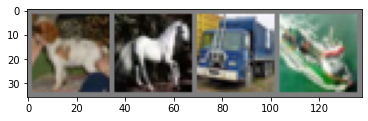

GroundTruth:    dog horse truck  ship


In [40]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [41]:
outputs = net(images)

In [42]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer horse truck  ship


In [27]:
!ls /data

cifar-10-batches-py  cifar-10-python.tar.gz


In [28]:
!ls /data/cifar-10-batches-py

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
